# 💊 COVID-19 pandemic statistics 💊

## I. Content: 
This analysis is based on data from the World Health Organization (WHO), covering the period from January 2020 to August 2020. It is a personal project of mine, aimed at gaining deeper insights into the COVID-19 pandemic and developing a more comprehensive understanding of the outbreak.

Link: https://www.stats.govt.nz/large-datasets/csv-files-for-download/

## II. 📊 Useful Insights from COVID-19 Data

1. 🕒 **Time-Based Trends**

-   Line charts showing confirmed cases, deaths, and recoveries over time (daily or monthly).

-   Identify outbreak peaks and major turning points.

2. 🌍 **Country Comparisons**

-   Analyze which countries have highest mortality rates relative to infections.

-   Compare recovery effectiveness across regions or countries.

3. ⚖️ **Mortality and Recovery Rates**

-   Compute:

    -   **Mortality rate** = `Deaths / Confirmed`

    -   **Recovery rate** = `Recovered / Confirmed`

-   Observe trends over time or between countries/regions.

4. 📅 **Segment by Time Periods**

-   Group data by quarter, year, or health policy phases (e.g. lockdowns, vaccination periods).

-   Analyze impact of timing on epidemic control.

5. 📈 **Growth Analysis**

-   Measure case growth over days/weeks.

-   Track percentage change compared to previous period to assess trend direction.

| Column             | Description                                                                                                |
| ------------------ | ---------------------------------------------------------------------------------------------------------- |
| **Date**           | The reporting date (formatted as mm/dd/yyyy)                                                               |
| **Country/Region** | Name of the country or territory reporting the data                                                        |
| **Confirmed**      | Cumulative number of **confirmed COVID-19 cases** up to that date                                          |
| **Deaths**         | Cumulative number of **COVID-19 related deaths** up to that date                                           |
| **Recovered**      | Cumulative number of **recovered cases** reported up to that date                                          |
| **Active**         | Number of **currently active cases** at that time (typically calculated as Confirmed − Deaths − Recovered) |
| **New cases**      | Number of **newly confirmed cases** on that specific day                                                   |
| **New deaths**     | Number of **new deaths** reported on that specific day                                                     |
| **New recovered**  | Number of **new recoveries** reported on that specific day                                                 |
| **WHO Region**     | **WHO-designated region** (e.g., Europe, Africa, Americas, etc.)                                           |
| **iso\_alpha**     | ISO Alpha-3 **country code** (three-letter abbreviation, e.g., `VNM` for Vietnam, `USA` for the USA)       |


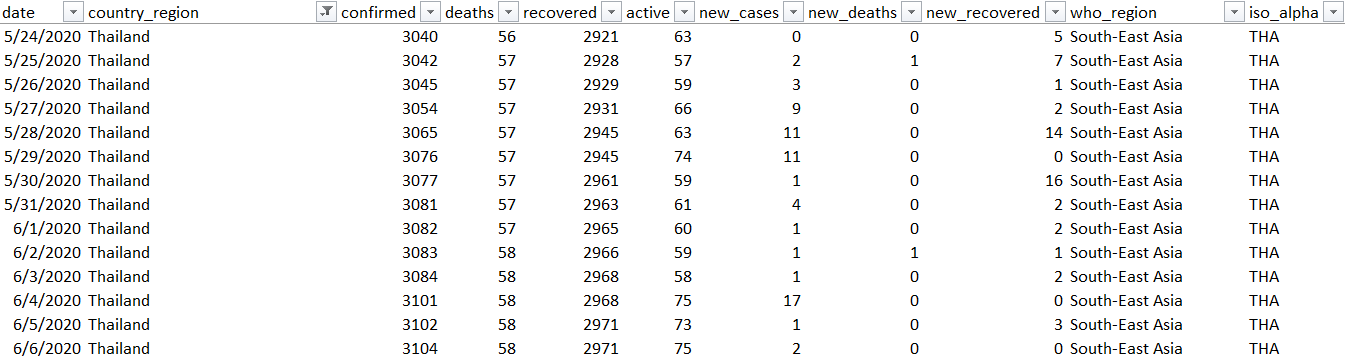

## III. Data cleaning
### 📚 Import libraries

In [168]:
# your code here
# Import necessary libraries
import pandas as pd                # Handle tabular data
import numpy as np                # Handle missing values, NaN, and mathematical operations
import dateparser                 # Parse date/time from natural language strings
from datetime import datetime     # Work with date and time objects
from collections import Counter   # Count errors or anomalies in data
import math                       # Mathematical functions
import matplotlib.pyplot as plt   # Plotting library
import seaborn as sns             # Visualization with advanced plots

In [169]:
# your code here

df = pd.read_csv(r"data_selflearning\covid_grouped.csv")
df.sample(5)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,iso_alpha
5745,2020-02-21,Portugal,0,0,0,0,0,0,0,Europe,PRT
16614,2020-04-19,Sri Lanka,271,7,96,168,17,0,10,South-East Asia,LKA
1157,2020-01-28,Chile,0,0,0,0,0,0,0,Americas,CHL
21215,2020-05-14,Israel,16579,265,12521,3793,31,1,289,Europe,ISR
25864,2020-06-08,Ethiopia,2156,27,361,1768,136,0,17,Africa,ETH


In [170]:
# Convert column headers to lowercase

import pandas as pd
import re

df.columns = [re.sub(r'\W+', '_', col.lower().strip()) for col in df.columns]


In [171]:
df.sample(5)        # Check dataframe

,date,country_region,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered,who_region,iso_alpha
24107,2020-05-29,Tunisia,1071,48,946,77,3,0,8,Eastern Mediterranean,TUN
5321,2020-02-19,Italy,3,0,0,3,0,0,0,Europe,ITA
10283,2020-03-16,Zambia,0,0,0,0,0,0,0,Africa,ZMB
29000,2020-06-25,Belarus,60382,367,41448,18567,437,5,1312,Europe,BLR
2727,2020-02-05,Mauritania,0,0,0,0,0,0,0,Africa,MRT


### 🍍 Generate statistical summaries for the dataframe

In [172]:
df.shape

(35156, 11)

In [173]:
# List column names in dataframe
df.columns

Index(['date', 'country_region', 'confirmed', 'deaths', 'recovered', 'active',
       'new_cases', 'new_deaths', 'new_recovered', 'who_region', 'iso_alpha'],
      dtype='object')

In [174]:
# Statistics (for numeric format only)
df.describe()

,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered
count,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
std,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852
min,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000


In [175]:
# Show dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            35156 non-null  object
 1   country_region  35156 non-null  object
 2   confirmed       35156 non-null  int64 
 3   deaths          35156 non-null  int64 
 4   recovered       35156 non-null  int64 
 5   active          35156 non-null  int64 
 6   new_cases       35156 non-null  int64 
 7   new_deaths      35156 non-null  int64 
 8   new_recovered   35156 non-null  int64 
 9   who_region      35156 non-null  object
 10  iso_alpha       35156 non-null  object
dtypes: int64(7), object(4)
memory usage: 3.0+ MB


### 🔍 Cleaning data

In [176]:
# Count empty values in columns
df.isna().sum()

date              0
country_region    0
confirmed         0
deaths            0
recovered         0
active            0
new_cases         0
new_deaths        0
new_recovered     0
who_region        0
iso_alpha         0
dtype: int64

In [177]:
# Show columns index

for i, col in enumerate(df.columns):
    print(i, col)

0 date
1 country_region
2 confirmed
3 deaths
4 recovered
5 active
6 new_cases
7 new_deaths
8 new_recovered
9 who_region
10 iso_alpha


In [178]:
# Count the number of fully duplicated rows
num_duplicates = df.duplicated().sum()
print(f"The number of fully duplicated rows: {num_duplicates}")

The number of fully duplicated rows: 0


In [179]:
# Check datatype
print(df['date'].dtypes)  

object


In [180]:
# Convert to datetime
df['date'] = pd.to_datetime(df['date'])

In [181]:
# Check datatype
print(df['date'].dtypes)  

datetime64[ns]


In [182]:
# Check non-integer

import pandas as pd
columns_to_check = ['confirmed', 'deaths', 'recovered', 'active', 'new_cases', 'new_deaths', 'new_recovered']

# Count the number of non-integer values in each column
non_int_counts = {}
for col in columns_to_check:
    non_int_counts[col] = df[col].apply(lambda x: not isinstance(x, int)).sum()

# Result
for col, count in non_int_counts.items():
    print(f"non-integer values || {col}: {count}")


non-integer values || confirmed: 0
non-integer values || deaths: 0
non-integer values || recovered: 0
non-integer values || active: 0
non-integer values || new_cases: 0
non-integer values || new_deaths: 0
non-integer values || new_recovered: 0


In [183]:
# 🔍 Check for values < 0
# Columns to check for negative values
columns_to_check = ['confirmed', 'deaths', 'recovered', 'active', 'new_cases', 'new_deaths', 'new_recovered']

# Count the number of negative values in each column
negative_counts = df[columns_to_check].apply(lambda x: (x < 0).sum())

# Display the result
print("🔍 Number of negative values in each column:")
print(negative_counts)


🔍 Number of negative values in each column:
confirmed         0
deaths            0
recovered         0
active            2
new_cases         0
new_deaths       38
new_recovered    77
dtype: int64


In [184]:
df.shape

(35156, 11)

Remove columns with invalid values (active, new_deaths, new_recovered)

In [185]:
import pandas as pd

# Ensure the 'active' column is numeric (if needed)
df['active'] = pd.to_numeric(df['active'], errors='coerce')

# Remove rows with negative values in the 'active' column
df = df[df['active'] >= 0]


In [186]:
import pandas as pd

# df = original_df.copy()

# Ensure the 'new_deaths' column is numeric
df.loc[:, 'new_deaths'] = pd.to_numeric(df['new_deaths'], errors='coerce')

# Remove rows with negative values in the 'new_deaths' column
df = df[df['new_deaths'] >= 0]


In [187]:
import pandas as pd

# df = original_df.copy()

# Ensure the 'new_recovered' column is numeric
df.loc[:, 'new_recovered'] = pd.to_numeric(df['new_recovered'], errors='coerce')

# Remove rows with negative values in the 'new_recovered' column
df = df[df['new_recovered'] >= 0]

In [188]:
df.shape

(35041, 11)

In [189]:
import pandas as pd

# List of columns to check for datetime validity
columns_to_check = ['date']  # Replace 'date' with the actual column name(s) you want to check

# Function to count invalid datetime values in a column
def count_invalid_datetime(series):
    non_blank = series.dropna().astype(str).str.strip()          # Remove NaNs and whitespace
    non_blank = non_blank[non_blank != '']                       # Exclude empty strings
    invalid_count = pd.to_datetime(non_blank, errors='coerce').isna().sum()
    return invalid_count

# Check each column and print results
for col in columns_to_check:
    invalid = count_invalid_datetime(df[col])
    print(f"Number of values in column '{col}' that are not valid datetime format: {invalid}")



Number of values in column 'date' that are not valid datetime format: 0


In [190]:
# Show dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35041 entries, 0 to 35155
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            35041 non-null  datetime64[ns]
 1   country_region  35041 non-null  object        
 2   confirmed       35041 non-null  int64         
 3   deaths          35041 non-null  int64         
 4   recovered       35041 non-null  int64         
 5   active          35041 non-null  int64         
 6   new_cases       35041 non-null  int64         
 7   new_deaths      35041 non-null  int64         
 8   new_recovered   35041 non-null  int64         
 9   who_region      35041 non-null  object        
 10  iso_alpha       35041 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 3.2+ MB


️🏆 So, There are no empty cells, no duplicate entries, and all columns are in the correct format!!!

In [191]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Split into day, month, year and month-year
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['month_year'] = df['date'].dt.to_period('M').astype(str)  # example: '2020-04'


In [192]:
df['who_region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [193]:
num_region = df['who_region'].nunique()
print(f"Region for stats: {num_region}")

Region for stats: 6


In [194]:
df.sample(5)

,date,country_region,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered,who_region,iso_alpha,day,month,year,month_year
11730,2020-03-24,Qatar,526,0,41,485,25,0,8,Eastern Mediterranean,QAT,24,3,2020,2020-03
18800,2020-05-01,Liechtenstein,82,1,80,1,0,0,0,Europe,LIE,1,5,2020,2020-05
11590,2020-03-23,Western Sahara,0,0,0,0,0,0,0,Africa,ESH,23,3,2020,2020-03
15185,2020-04-12,Comoros,0,0,0,0,0,0,0,Africa,COM,12,4,2020,2020-04
2581,2020-02-04,Singapore,24,0,0,24,6,0,0,Western Pacific,SGP,4,2,2020,2020-02


Kiểm tra các cột dạng số có đúng quy tắc không:

**Active:** Số **ca đang điều trị** tại thời điểm đó `(thường được tính = Confirmed − Deaths − Recovered)`

Check if numerical columns follow expected rules:

**Active:** Number of currently active cases at the given time
`(typically calculated as = Confirmed − Deaths − Recovered)`

In [195]:
import pandas as pd

# Step 1: Create a new calculated column
df["calculated_active"] = df["confirmed"] - df["deaths"] - df["recovered"]

# Step 2: Compare the actual 'active' column with the calculated one
df["active_match"] = df["active"] == df["calculated_active"]

# Step 3: Filter rows where the values do not match
invalid_active_rows = df[df["active_match"] == False]

# Step 4: Export the mismatched rows to CSV
invalid_active_rows.to_csv("invalid_active_rows.csv", index=False)

# Optional: Print how many mismatches found
print(f"Total mismatched rows: {len(invalid_active_rows)}")

Total mismatched rows: 0


In [196]:
# Export file csv
df.to_csv('cleaned_covid_grouped.csv', index=False, encoding='utf-8-sig')

## 🛠 Exploratory Data Analysis (EDA)

Line chart showing the number of confirmed cases, deaths, and recoveries over time (by day or month).<br>
Identify outbreak points or peak periods of the pandemic.

### 1. Trend Over Time

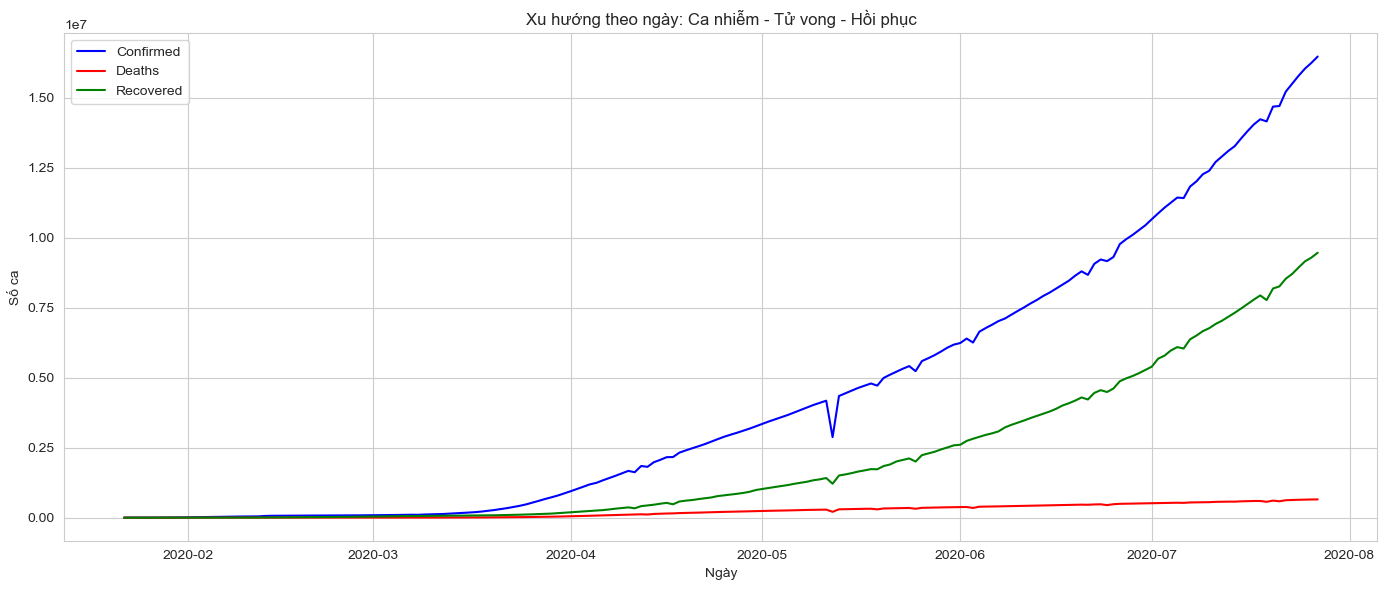

In [197]:
import matplotlib.pyplot as plt

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Group data by day (if needed)
daily_df = df.groupby('date')[['confirmed', 'deaths', 'recovered']].sum()

# Plot line chart by day
plt.figure(figsize=(14, 6))
plt.plot(daily_df.index, daily_df['confirmed'], label='Confirmed', color='blue')
plt.plot(daily_df.index, daily_df['deaths'], label='Deaths', color='red')
plt.plot(daily_df.index, daily_df['recovered'], label='Recovered', color='green')
plt.title('Xu hướng theo ngày: Ca nhiễm - Tử vong - Hồi phục')
plt.xlabel('Ngày')
plt.ylabel('Số ca')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


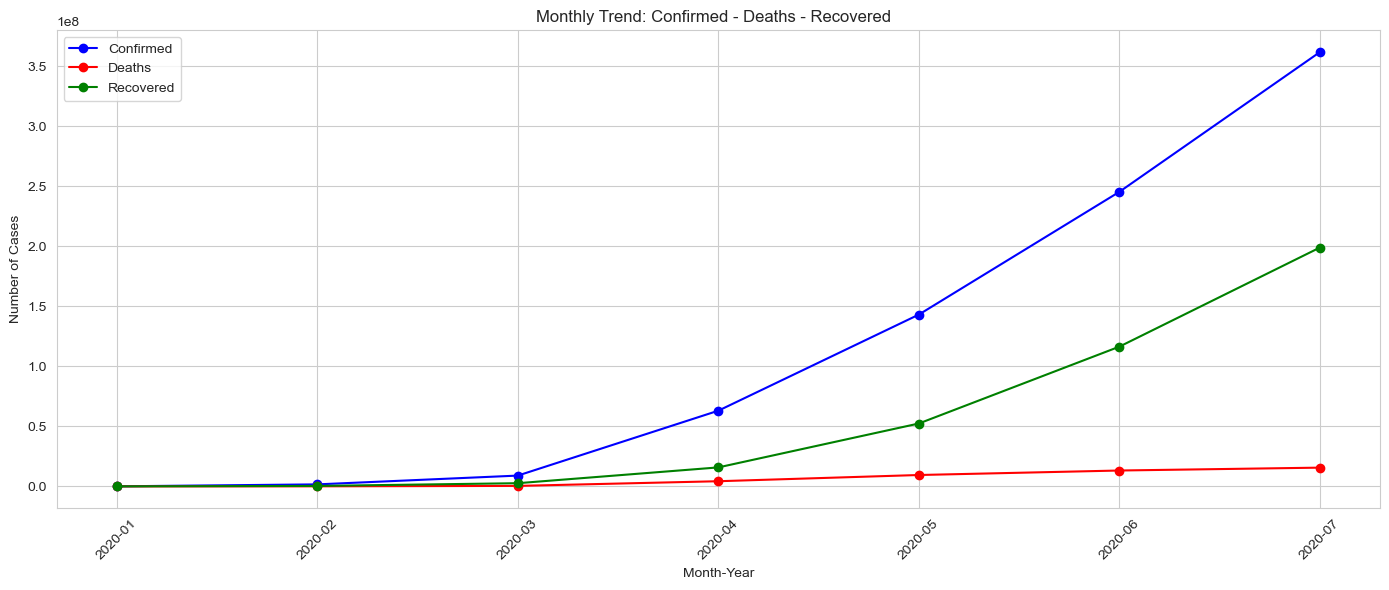

In [198]:
# Group data by month and year
monthly_df = df.groupby('month_year')[['confirmed', 'deaths', 'recovered']].sum()

# Plot line chart by month and year
plt.figure(figsize=(14, 6))
plt.plot(monthly_df.index, monthly_df['confirmed'], label='Confirmed', color='blue', marker='o')
plt.plot(monthly_df.index, monthly_df['deaths'], label='Deaths', color='red', marker='o')
plt.plot(monthly_df.index, monthly_df['recovered'], label='Recovered', color='green', marker='o')
plt.title('Monthly Trend: Confirmed - Deaths - Recovered  ')
plt.xlabel('Month-Year')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [199]:
peak_confirmed = daily_df['confirmed'].idxmax()
peak_deaths = daily_df['deaths'].idxmax()
peak_recovered = daily_df['recovered'].idxmax()

print(f"🔥 Peak of Confirmed Cases: {peak_confirmed}")
print(f"⚰️ Peak of Deaths: {peak_deaths}")
print(f"💪 Peak of Recoveries: {peak_recovered}")


🔥 Peak of Confirmed Cases: 2020-07-27 00:00:00
⚰️ Peak of Deaths: 2020-07-27 00:00:00
💪 Peak of Recoveries: 2020-07-27 00:00:00


Other way

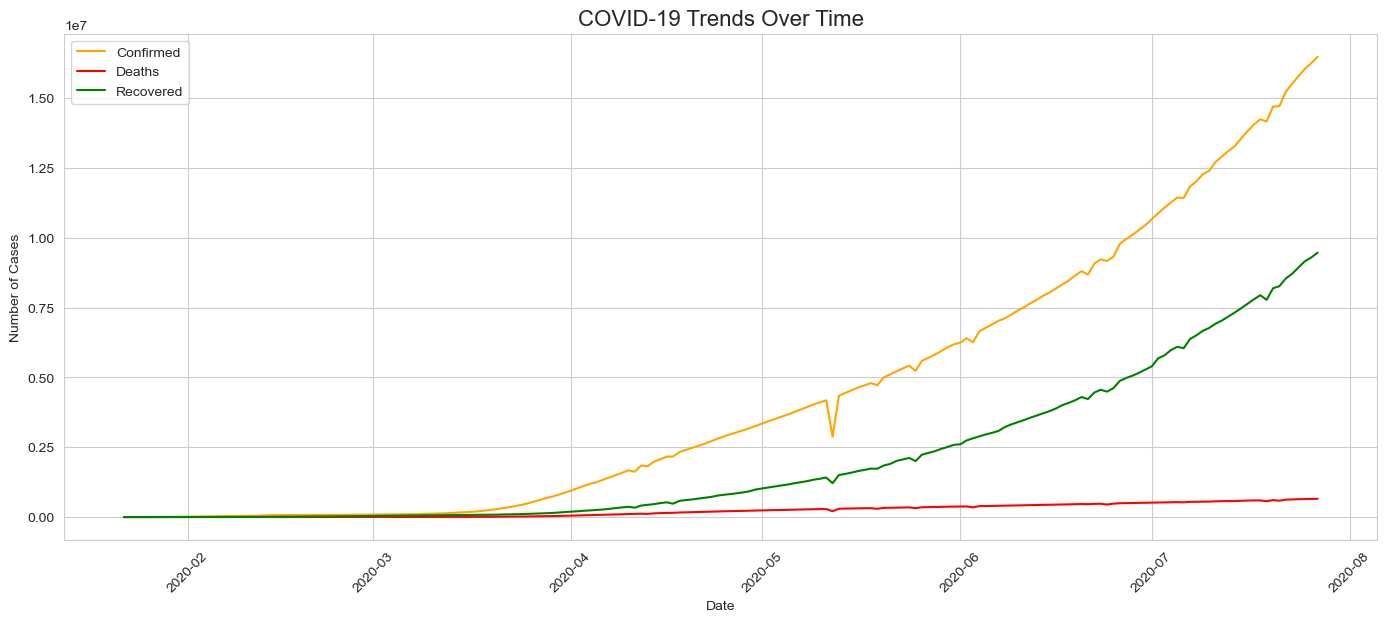

📈 Peak Confirmed: 2020-07-27 with 16480485 cases
💀 Peak Deaths: 2020-07-27 with 654036 deaths
💚 Peak Recovered: 2020-07-27 with 9468087 recoveries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Group data by date if there are multiple records per day
daily_df = df.groupby('date')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

# Plot line chart
plt.figure(figsize=(14, 6))
plt.plot(daily_df['date'], daily_df['confirmed'], label='Confirmed', color='orange')
plt.plot(daily_df['date'], daily_df['deaths'], label='Deaths', color='red')
plt.plot(daily_df['date'], daily_df['recovered'], label='Recovered', color='green')

plt.title('COVID-19 Trends Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# 🧠 The day of peak
peak_confirmed = daily_df.loc[daily_df['confirmed'].idxmax()]
peak_deaths = daily_df.loc[daily_df['deaths'].idxmax()]
peak_recovered = daily_df.loc[daily_df['recovered'].idxmax()]

print("📈 Peak Confirmed:", peak_confirmed['date'].date(), "with", peak_confirmed['confirmed'], "cases")
print("💀 Peak Deaths:", peak_deaths['date'].date(), "with", peak_deaths['deaths'], "deaths")
print("💚 Peak Recovered:", peak_recovered['date'].date(), "with", peak_recovered['recovered'], "recoveries")


Another way: combine charts to display in the same table

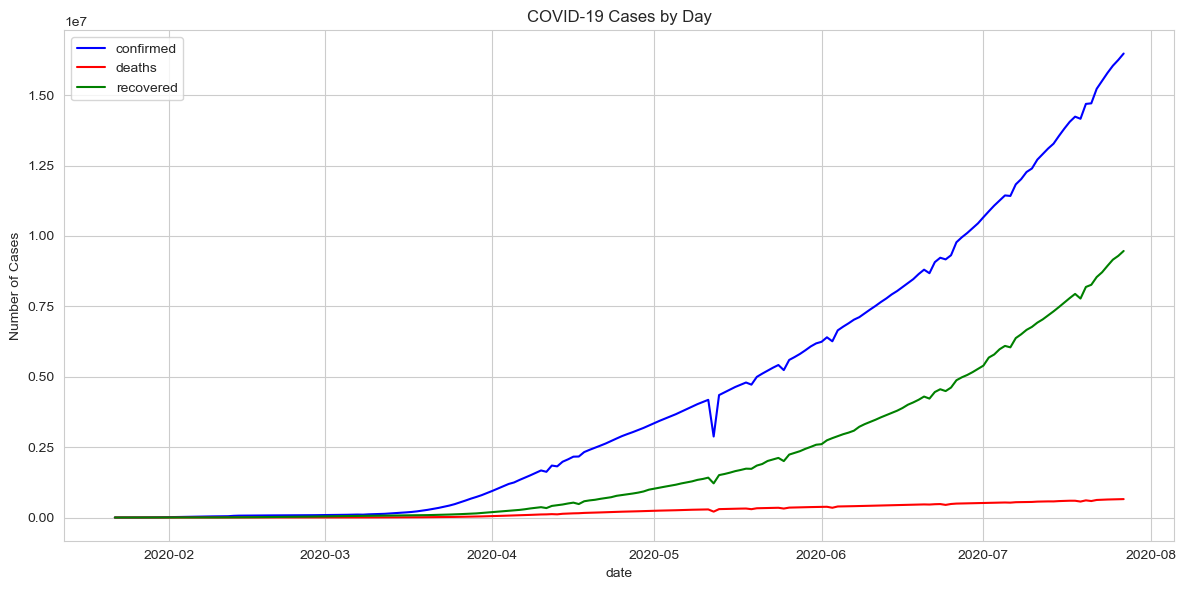

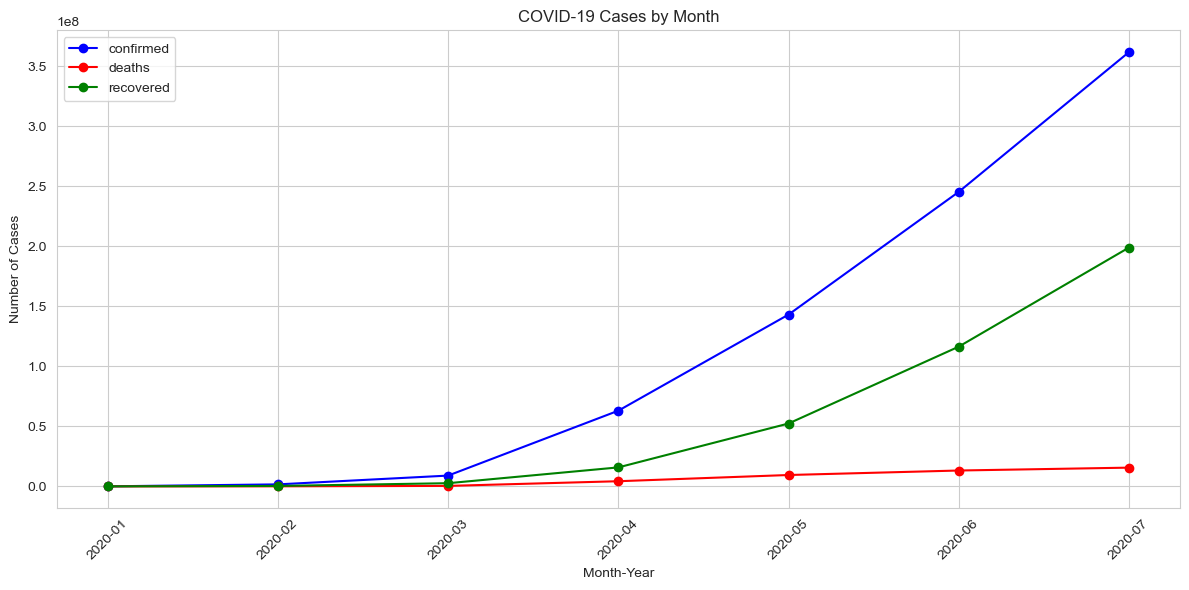

📈 Peak Confirmed: 2020-07-27 with 16480485 cases
💀 Peak Deaths: 2020-07-27 with 654036 deaths
💚 Peak Recovered: 2020-07-27 with 9468087 recoveries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# --- Chart 1: Daily statistics ---
df_daily = df.groupby('date')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_daily['date'], df_daily['confirmed'], label='confirmed', color='blue')
plt.plot(df_daily['date'], df_daily['deaths'], label='deaths', color='red')
plt.plot(df_daily['date'], df_daily['recovered'], label='recovered', color='green')
plt.title('COVID-19 Cases by Day')
plt.xlabel('date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Chart 2: Monthly-Yearly statistics ---
df['month_year'] = df['date'].dt.to_period('M')
df_monthly = df.groupby('month_year')[['confirmed', 'deaths', 'recovered']].sum().reset_index()
df_monthly['month_year'] = df_monthly['month_year'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(df_monthly['month_year'], df_monthly['confirmed'], label='confirmed', color='blue', marker='o')
plt.plot(df_monthly['month_year'], df_monthly['deaths'], label='deaths', color='red', marker='o')
plt.plot(df_monthly['month_year'], df_monthly['recovered'], label='recovered', color='green', marker='o')
plt.title('COVID-19 Cases by Month')
plt.xlabel('Month-Year')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🧠 Identify the peak day
peak_confirmed = daily_df.loc[daily_df['confirmed'].idxmax()]
peak_deaths = daily_df.loc[daily_df['deaths'].idxmax()]
peak_recovered = daily_df.loc[daily_df['recovered'].idxmax()]

print("📈 Peak Confirmed:", peak_confirmed['date'].date(), "with", peak_confirmed['confirmed'], "cases")
print("💀 Peak Deaths:", peak_deaths['date'].date(), "with", peak_deaths['deaths'], "deaths")
print("💚 Peak Recovered:", peak_recovered['date'].date(), "with", peak_recovered['recovered'], "recoveries")

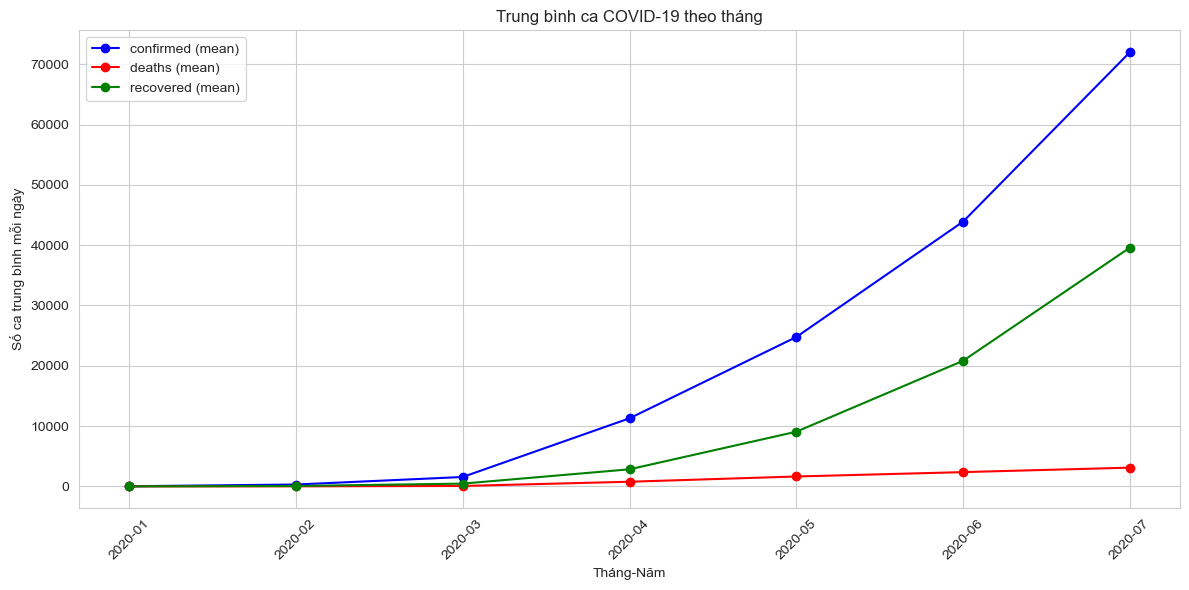

In [ ]:
# --- Calculate monthly-yearly averages ---
df['month_year'] = df['date'].dt.to_period('M')
df_monthly_avg = df.groupby('month_year')[['confirmed', 'deaths', 'recovered']].mean().reset_index()
df_monthly_avg['month_year'] = df_monthly_avg['month_year'].astype(str)

# --- Plot average chart ---
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_avg['month_year'], df_monthly_avg['confirmed'], label='confirmed (mean)', color='blue', marker='o')
plt.plot(df_monthly_avg['month_year'], df_monthly_avg['deaths'], label='deaths (mean)', color='red', marker='o')
plt.plot(df_monthly_avg['month_year'], df_monthly_avg['recovered'], label='recovered (mean)', color='green', marker='o')
plt.title('Average COVID-19 Cases by Month')
plt.xlabel('Month-Year')
plt.ylabel('Average Daily Cases')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 2. Comparison Between Countries

**The following Python code uses Pandas and Matplotlib/Seaborn to:**

-   Calculate the total number of confirmed, death, and recovered cases by country

-   Compute the death rate and recovery rate

-   Identify the country with the highest death rate and highest recovery rate

-   Visualize this data using bar charts

In [245]:
import pandas as pd

# Assume df is a DataFrame containing COVID-19 data with the following columns:
# 'country', 'confirmed', 'deaths', 'recovered'

# Step 1: Calculate total confirmed, deaths, and recovered cases by country
country_stats = df.groupby('country_region')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

# Step 2: Compute death rate and recovery rate
country_stats['death_rate'] = country_stats['deaths'] / country_stats['confirmed']
country_stats['recovery_rate'] = country_stats['recovered'] / country_stats['confirmed']

# Step 3: Find the country with the highest death rate
highest_death_rate = country_stats.sort_values(by='death_rate', ascending=False).head(1)

# Step 4: Find the country with the highest recovery rate
highest_recovery_rate = country_stats.sort_values(by='recovery_rate', ascending=False).head(1)

# Display the results
print("Country with the highest death rate:")
print(highest_death_rate[['country_region', 'death_rate']])

print("=========================================")

print("\nCountry with the highest recovery rate:")
print(highest_recovery_rate[['country_region', 'recovery_rate']])


Country with the highest death rate:
    country_region  death_rate
184          Yemen    0.263822

Country with the highest recovery rate:
    country_region  recovery_rate
100  Liechtenstein       0.914167


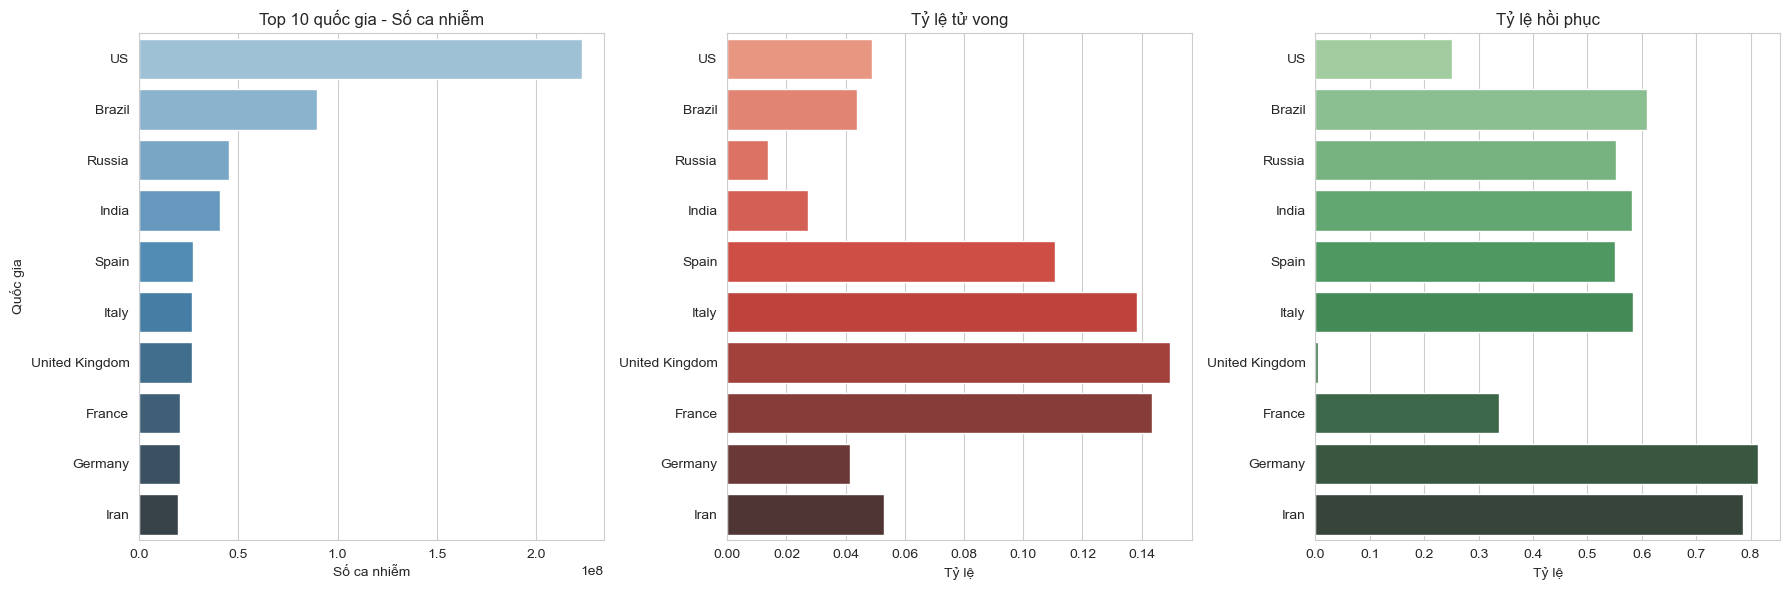

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử df là dataframe đã load và các cột đều viết thường
df = df.copy()
df.columns = df.columns.str.lower()

# Tính tổng số theo quốc gia
country_stats = df.groupby('country_region')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

# Tính tỷ lệ
country_stats['death_rate'] = country_stats['deaths'] / country_stats['confirmed']
country_stats['recovery_rate'] = country_stats['recovered'] / country_stats['confirmed']

# Top 10 quốc gia có số ca nhiễm cao nhất
top10 = country_stats.sort_values('confirmed', ascending=False).head(10)

# Vẽ biểu đồ
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.set_style("whitegrid")

# Biểu đồ 1: Tổng số ca nhiễm
sns.barplot(data=top10, y='country_region', x='confirmed', hue='country_region', palette='Blues_d', legend=False, ax=axes[0])
axes[0].set_title('Top 10 quốc gia - Số ca nhiễm')
axes[0].set_xlabel('Số ca nhiễm')
axes[0].set_ylabel('Quốc gia')

# Biểu đồ 2: Tỷ lệ tử vong
sns.barplot(data=top10, y='country_region', x='death_rate', hue='country_region', palette='Reds_d', legend=False, ax=axes[1])
axes[1].set_title('Tỷ lệ tử vong')
axes[1].set_xlabel('Tỷ lệ')
axes[1].set_ylabel('')

# Biểu đồ 3: Tỷ lệ hồi phục
sns.barplot(data=top10, y='country_region', x='recovery_rate', hue='country_region', palette='Greens_d', legend=False, ax=axes[2])
axes[2].set_title('Tỷ lệ hồi phục')
axes[2].set_xlabel('Tỷ lệ')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()


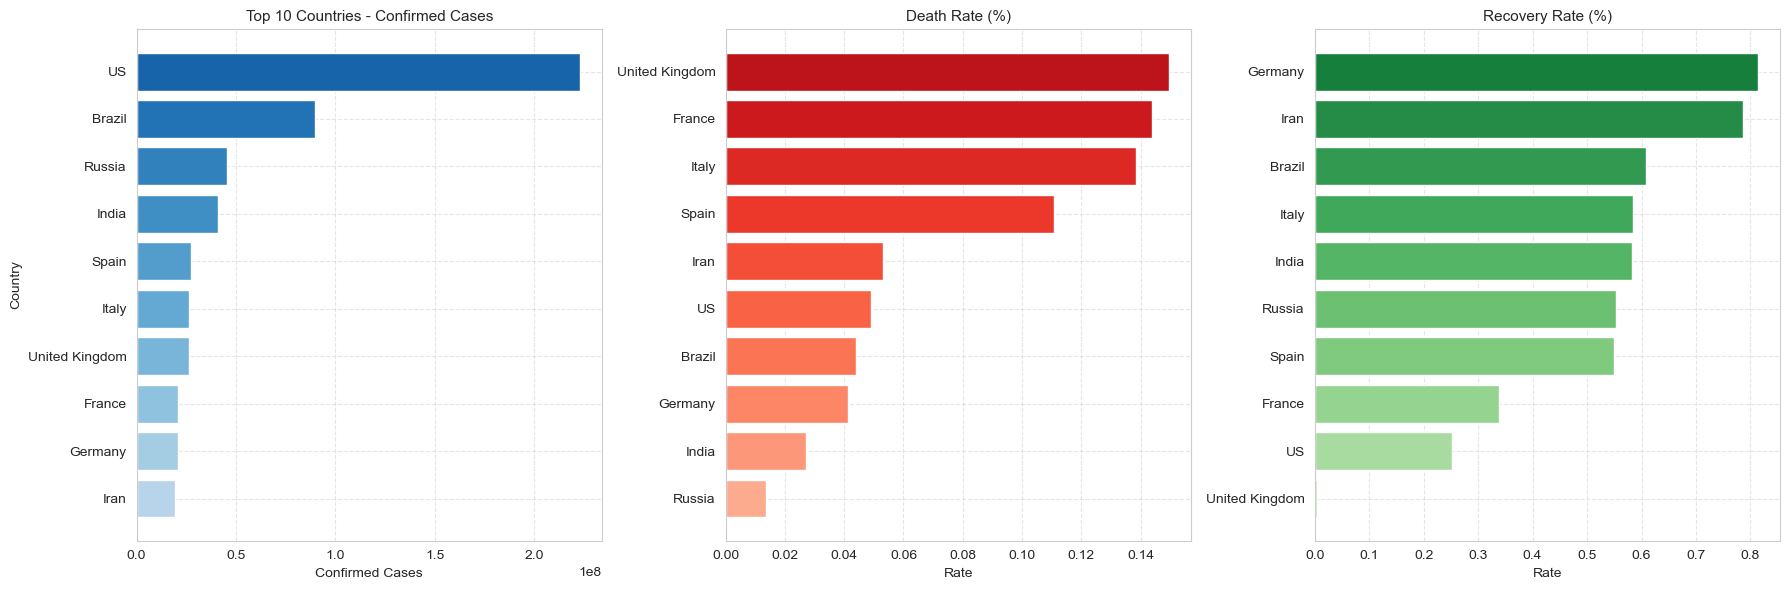

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assume df is the loaded DataFrame with all lowercase column names
df = df.copy()
df.columns = df.columns.str.lower()

# Compute total counts by country
country_stats = df.groupby('country_region')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

# Calculate death and recovery rates
country_stats['death_rate'] = country_stats['deaths'] / country_stats['confirmed']
country_stats['recovery_rate'] = country_stats['recovered'] / country_stats['confirmed']

# Top 10 countries with the highest number of confirmed cases
top10 = country_stats.sort_values('confirmed', ascending=False).head(10)

# Sort each DataFrame for better visualization
dfplot1 = top10.sort_values('confirmed', ascending=True)
dfplot2 = top10.sort_values('death_rate', ascending=True)
dfplot3 = top10.sort_values('recovery_rate', ascending=True)

# Create layout for 3 subplots
plt.figure(figsize=(18, 6))

# --- Subplot 1: Total Confirmed Cases ---
plt.subplot(1, 3, 1)
plt.barh(
    y=dfplot1['country_region'],
    width=dfplot1['confirmed'],
    color=plt.cm.Blues(np.linspace(0.3, 0.8, len(dfplot1)))
)
plt.title('Top 10 Countries - Confirmed Cases', fontsize=11)
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.grid(True, linestyle='--', alpha=0.5)

# --- Subplot 2: Death Rate ---
plt.subplot(1, 3, 2)
plt.barh(
    y=dfplot2['country_region'],
    width=dfplot2['death_rate'],
    color=plt.cm.Reds(np.linspace(0.3, 0.8, len(dfplot2)))
)
plt.title('Death Rate (%)', fontsize=11)
plt.xlabel('Rate')
plt.ylabel('')
plt.grid(True, linestyle='--', alpha=0.5)

# --- Subplot 3: Recovery Rate ---
plt.subplot(1, 3, 3)
plt.barh(
    y=dfplot3['country_region'],
    width=dfplot3['recovery_rate'],
    color=plt.cm.Greens(np.linspace(0.3, 0.8, len(dfplot3)))
)
plt.title('Recovery Rate (%)', fontsize=11)
plt.xlabel('Rate')
plt.ylabel('')
plt.grid(True, linestyle='--', alpha=0.5)

# Final layout adjustment
plt.tight_layout()
plt.show()


Analysis specific to United Kingdom

COVID-19 Statistics for United Kingdom:
- Total confirmed cases: 26,388,768
- Total deaths: 3,944,824
- Total recoveries: 124,701
- Death rate: 14.95%
- Recovery rate: 0.47%


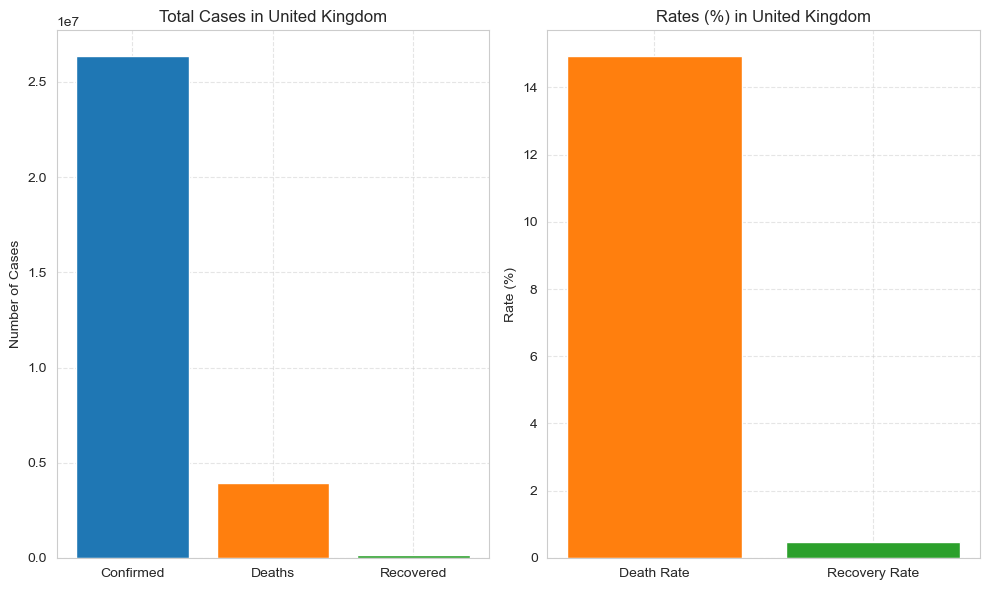

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assume df is the loaded dataframe, and all columns are in lowercase
df = df.copy()
df.columns = df.columns.str.lower()

# Filter data for United Kingdom
uk_data = df[df['country_region'] == 'United Kingdom'].copy()

# Calculate total confirmed cases, deaths, and recoveries
uk_stats = uk_data.groupby('country_region')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

# Calculate death rate and recovery rate
uk_stats['death_rate'] = uk_stats['deaths'] / uk_stats['confirmed']
uk_stats['recovery_rate'] = uk_stats['recovered'] / uk_stats['confirmed']

# Print summary statistics
print("COVID-19 Statistics for United Kingdom:")
print(f"- Total confirmed cases: {uk_stats['confirmed'].values[0]:,}")
print(f"- Total deaths: {uk_stats['deaths'].values[0]:,}")
print(f"- Total recoveries: {uk_stats['recovered'].values[0]:,}")
print(f"- Death rate: {uk_stats['death_rate'].values[0] * 100:.2f}%")
print(f"- Recovery rate: {uk_stats['recovery_rate'].values[0] * 100:.2f}%")

# Plot the data for United Kingdom
plt.figure(figsize=(10, 6))

# --- Subplot 1: Total confirmed, deaths, and recoveries ---
plt.subplot(1, 2, 1)
categories = ['Confirmed', 'Deaths', 'Recovered']
values = [
    uk_stats['confirmed'].values[0],
    uk_stats['deaths'].values[0],
    uk_stats['recovered'].values[0]
]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
plt.bar(categories, values, color=colors)
plt.title('Total Cases in United Kingdom')
plt.ylabel('Number of Cases')
plt.grid(True, linestyle='--', alpha=0.5)

# --- Subplot 2: Death rate and recovery rate ---
plt.subplot(1, 2, 2)
rates = ['Death Rate', 'Recovery Rate']
rate_values = [
    uk_stats['death_rate'].values[0] * 100,
    uk_stats['recovery_rate'].values[0] * 100
]
plt.bar(rates, rate_values, color=['#ff7f0e', '#2ca02c'])
plt.title('Rates (%) in United Kingdom')
plt.ylabel('Rate (%)')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

COVID-19 Statistics for United Kingdom:
- Total Confirmed Cases: 26,388,768
- Total Deaths: 3,944,824
- Total Recovered: 124,701
- Death Rate: 14.95%
- Recovery Rate: 0.47%


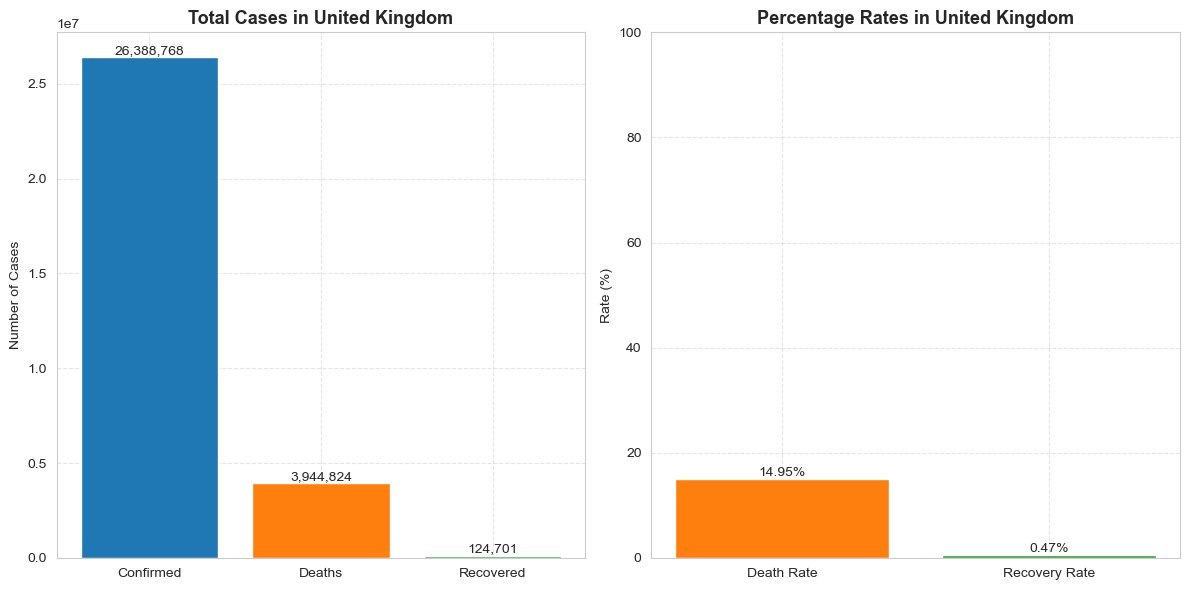

In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assume df is already loaded
df = df.copy()
df.columns = df.columns.str.lower()

# Filter data for United Kingdom
uk_data = df[df['country_region'] == 'United Kingdom'].copy()

# Aggregate total confirmed, deaths, and recovered cases
uk_stats = uk_data.groupby('country_region')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

# Calculate death rate and recovery rate
uk_stats['death_rate'] = uk_stats['deaths'] / uk_stats['confirmed']
uk_stats['recovery_rate'] = uk_stats['recovered'] / uk_stats['confirmed']

# Print summary statistics
print("COVID-19 Statistics for United Kingdom:")
print(f"- Total Confirmed Cases: {uk_stats['confirmed'].values[0]:,}")
print(f"- Total Deaths: {uk_stats['deaths'].values[0]:,}")
print(f"- Total Recovered: {uk_stats['recovered'].values[0]:,}")
print(f"- Death Rate: {uk_stats['death_rate'].values[0] * 100:.2f}%")
print(f"- Recovery Rate: {uk_stats['recovery_rate'].values[0] * 100:.2f}%")

# Plotting
plt.figure(figsize=(12, 6))

# --- Subplot 1: Total Cases ---
plt.subplot(1, 2, 1)
categories = ['Confirmed', 'Deaths', 'Recovered']
values = [
    uk_stats['confirmed'].values[0],
    uk_stats['deaths'].values[0],
    uk_stats['recovered'].values[0]
]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
bars1 = plt.bar(categories, values, color=colors)

# Add value labels to bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height):,}', 
             ha='center', va='bottom', fontsize=10)

plt.title('Total Cases in United Kingdom', fontsize=13, fontweight='bold')
plt.ylabel('Number of Cases')
plt.grid(True, linestyle='--', alpha=0.5)

# --- Subplot 2: Percentage Rates ---
plt.subplot(1, 2, 2)
rates = ['Death Rate', 'Recovery Rate']
rate_values = [
    uk_stats['death_rate'].values[0] * 100,
    uk_stats['recovery_rate'].values[0] * 100
]
bars2 = plt.bar(rates, rate_values, color=['#ff7f0e', '#2ca02c'])

# Add percentage labels to bars
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}%', 
             ha='center', va='bottom', fontsize=10)

plt.title('Percentage Rates in United Kingdom', fontsize=13, fontweight='bold')
plt.ylabel('Rate (%)')
plt.ylim(0, 100)  # Limit y-axis to 0–100% for better visualization
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Analysis specific to the United States (USA)

COVID-19 Statistics for US:
- Total Confirmed Cases: 222,970,796
- Total Deaths: 10,927,928
- Total Recovered: 56,123,129
- Death Rate: 4.90%
- Recovery Rate: 25.17%


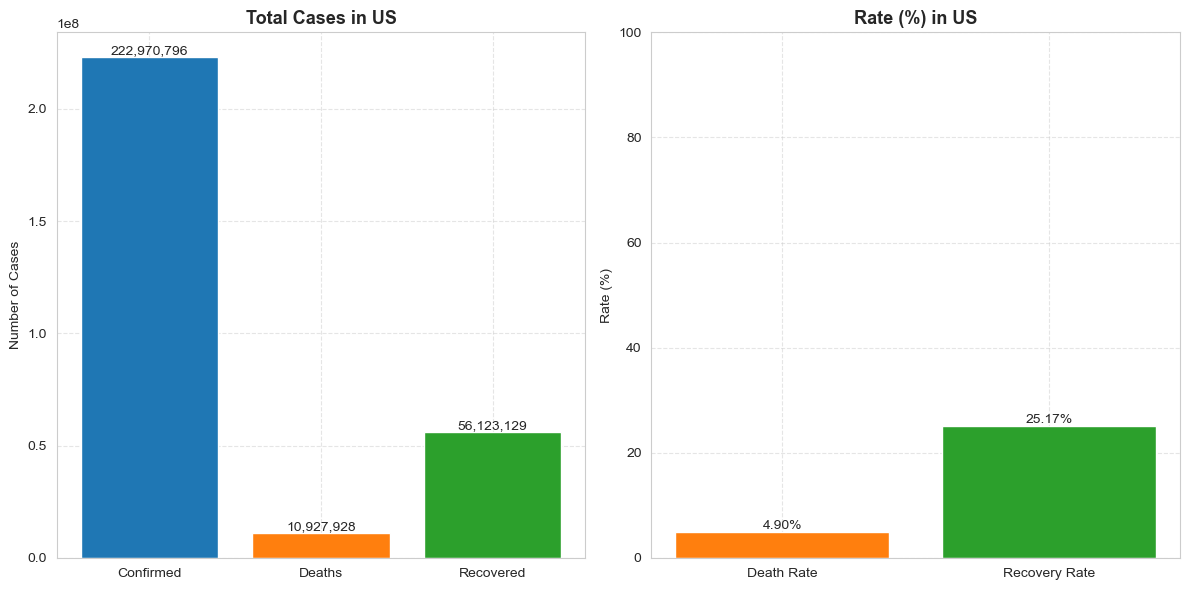

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assume df has already been loaded
df = df.copy()
df.columns = df.columns.str.lower()

# Filter data for the US
us_data = df[df['country_region'] == 'US'].copy()

# Calculate total confirmed, deaths, and recoveries
us_stats = us_data.groupby('country_region')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

# Calculate death rate and recovery rate
us_stats['death_rate'] = us_stats['deaths'] / us_stats['confirmed']
us_stats['recovery_rate'] = us_stats['recovered'] / us_stats['confirmed']

# Print summary information
print("COVID-19 Statistics for US:")
print(f"- Total Confirmed Cases: {us_stats['confirmed'].values[0]:,}")
print(f"- Total Deaths: {us_stats['deaths'].values[0]:,}")
print(f"- Total Recovered: {us_stats['recovered'].values[0]:,}")
print(f"- Death Rate: {us_stats['death_rate'].values[0] * 100:.2f}%")
print(f"- Recovery Rate: {us_stats['recovery_rate'].values[0] * 100:.2f}%")

# Plotting charts
plt.figure(figsize=(12, 6))

# --- Subplot 1: Total Cases ---
plt.subplot(1, 2, 1)
categories = ['Confirmed', 'Deaths', 'Recovered']
values = [
    us_stats['confirmed'].values[0],
    us_stats['deaths'].values[0],
    us_stats['recovered'].values[0]
]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
bars1 = plt.bar(categories, values, color=colors)

# Add value labels to bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height):,}', 
             ha='center', va='bottom', fontsize=10)

plt.title('Total Cases in US', fontsize=13, fontweight='bold')
plt.ylabel('Number of Cases')
plt.grid(True, linestyle='--', alpha=0.5)

# --- Subplot 2: Rate (%) ---
plt.subplot(1, 2, 2)
rates = ['Death Rate', 'Recovery Rate']
rate_values = [
    us_stats['death_rate'].values[0] * 100,
    us_stats['recovery_rate'].values[0] * 100
]
bars2 = plt.bar(rates, rate_values, color=['#ff7f0e', '#2ca02c'])

# Add percentage value labels
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}%', 
             ha='center', va='bottom', fontsize=10)

plt.title('Rate (%) in US', fontsize=13, fontweight='bold')
plt.ylabel('Rate (%)')
plt.ylim(0, 100)  # Limit from 0 to 100% for better visualization
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


### 3. Death and recovery rates over time

In [250]:
# Calculate death and recovery rates

# Assume df is a DataFrame containing COVID-19 data
df['death_rate'] = df['deaths'] / df['confirmed']
df['recovery_rate'] = df['recovered'] / df['confirmed']


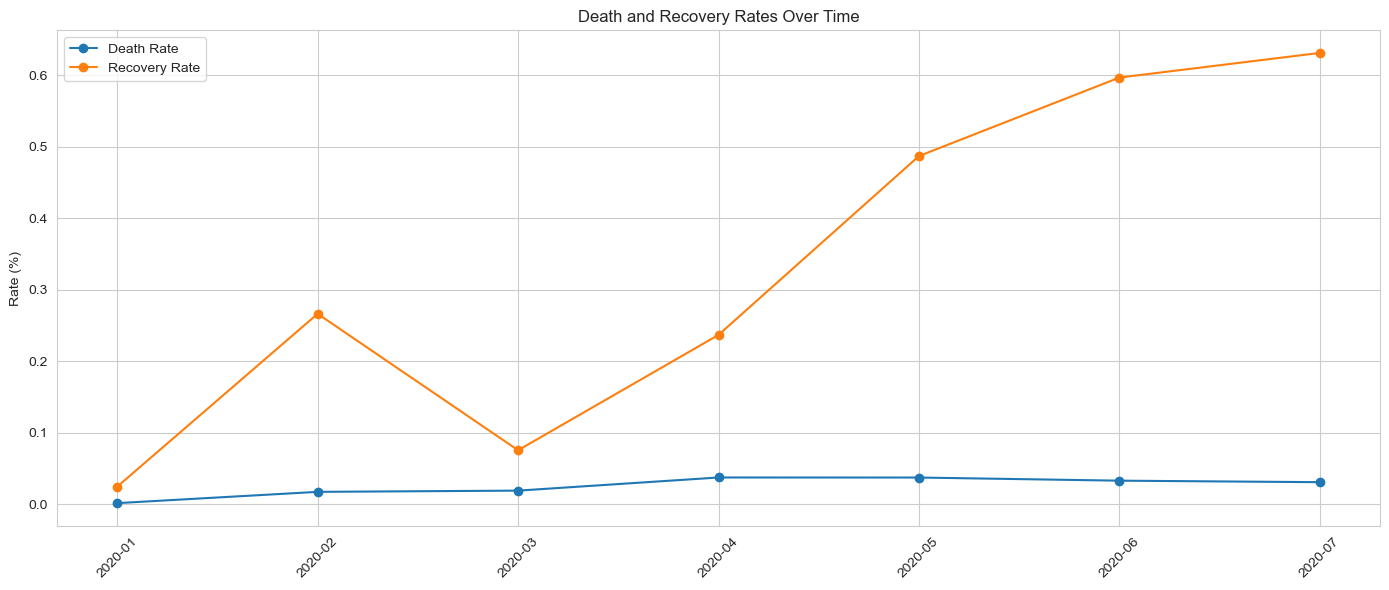

In [252]:
# Time-based comparison (e.g. by month-year)

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Create a 'month_year' column
df['month_year'] = df['date'].dt.to_period('M').astype(str)

# Calculate average rates by month-year
monthly = df.groupby('month_year')[['death_rate', 'recovery_rate']].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(monthly['month_year'], monthly['death_rate'], label='Death Rate', marker='o')
plt.plot(monthly['month_year'], monthly['recovery_rate'], label='Recovery Rate', marker='o')
plt.xticks(rotation=45)
plt.ylabel("Rate (%)")
plt.title("Death and Recovery Rates Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


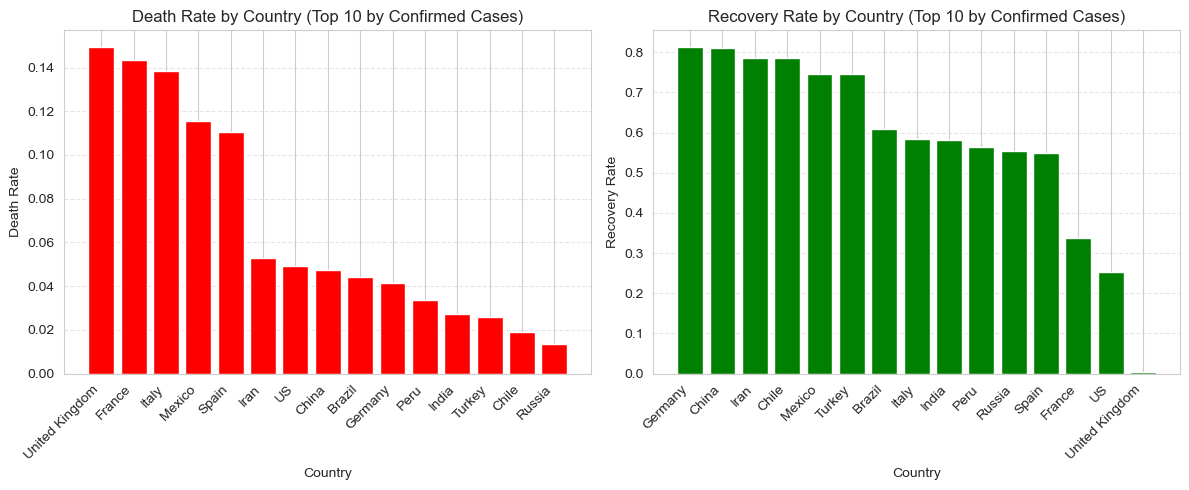

In [254]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate death and recovery rates
df_plot = df[['country_region', 'confirmed', 'deaths', 'recovered']].copy()
df_plot = df_plot.groupby('country_region').sum().reset_index()

# Remove countries with confirmed = 0 to avoid division by zero
df_plot = df_plot[df_plot['confirmed'] > 0]

df_plot['death_rate'] = df_plot['deaths'] / df_plot['confirmed']
df_plot['recovery_rate'] = df_plot['recovered'] / df_plot['confirmed']

# Select top 10 countries with the highest number of confirmed cases
top10 = df_plot.sort_values('confirmed', ascending=False).head(15)

# Sort by death_rate for better chart appearance
top10 = top10.sort_values('death_rate', ascending=False)

# Plot the charts
plt.figure(figsize=(12, 5))

# Subplot 1: Death Rate
plt.subplot(1, 2, 1)
plt.bar(top10['country_region'], top10['death_rate'], color='red')
plt.title('Death Rate by Country (Top 10 by Confirmed Cases)', fontsize=12)
plt.xlabel('Country')
plt.ylabel('Death Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Subplot 2: Recovery Rate
plt.subplot(1, 2, 2)
# Sort separately by recovery_rate
top10_recovery = top10.sort_values('recovery_rate', ascending=False)
plt.bar(top10_recovery['country_region'], top10_recovery['recovery_rate'], color='green')
plt.title('Recovery Rate by Country (Top 10 by Confirmed Cases)', fontsize=12)
plt.xlabel('Country')
plt.ylabel('Recovery Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Optimize layout
plt.tight_layout()
plt.show()


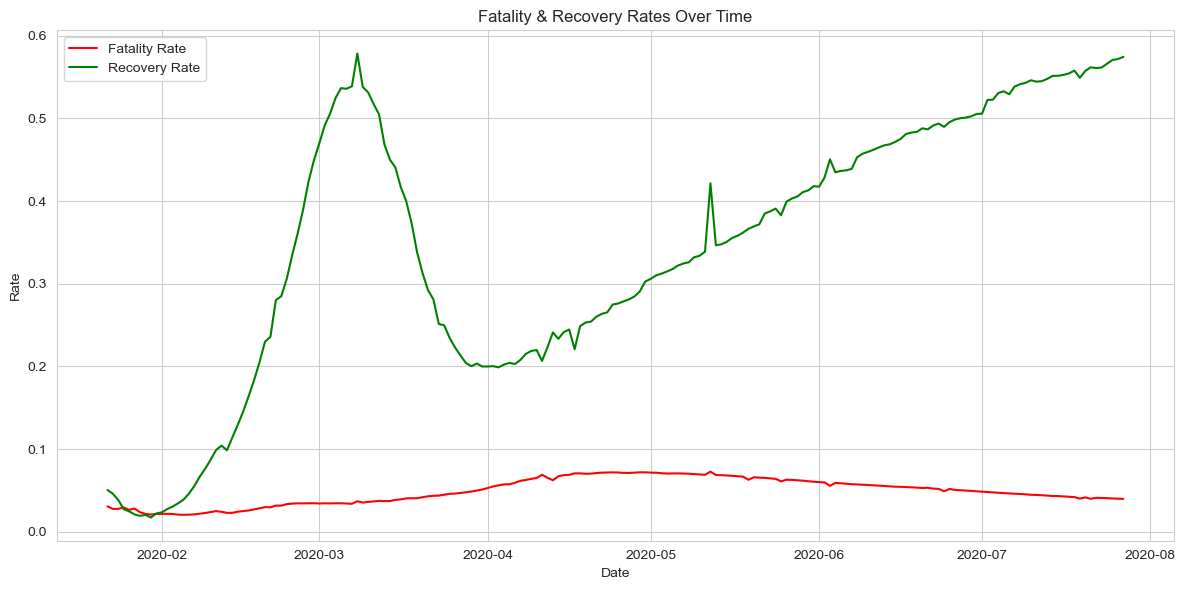

In [255]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume column names are lowercase: 'date', 'confirmed', 'deaths', 'recovered'
# If not, rename the columns accordingly
df['date'] = pd.to_datetime(df['date'])

# Group data by date
daily_stats = df.groupby('date').agg({
    'confirmed': 'sum',
    'deaths': 'sum',
    'recovered': 'sum'
}).reset_index()

# Calculate rates
daily_stats['fatality_rate'] = daily_stats['deaths'] / daily_stats['confirmed']
daily_stats['recovery_rate'] = daily_stats['recovered'] / daily_stats['confirmed']

# Remove rows with confirmed = 0 (to avoid division by zero)
daily_stats = daily_stats[daily_stats['confirmed'] > 0]

# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_stats['date'], daily_stats['fatality_rate'], label='Fatality Rate', color='red')
plt.plot(daily_stats['date'], daily_stats['recovery_rate'], label='Recovery Rate', color='green')
plt.title('Fatality & Recovery Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


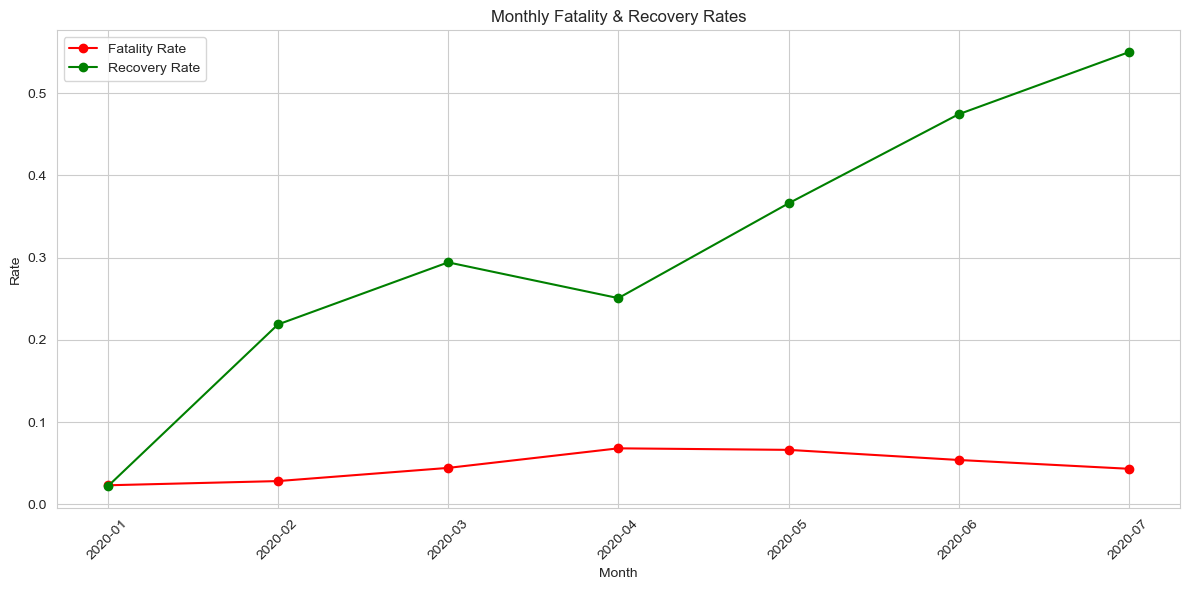

In [ ]:
df['month'] = df['date'].dt.to_period('M')
monthly_stats = df.groupby('month').agg({
    'confirmed': 'sum',
    'deaths': 'sum',
    'recovered': 'sum'
}).reset_index()

monthly_stats['fatality_rate'] = monthly_stats['deaths'] / monthly_stats['confirmed']
monthly_stats['recovery_rate'] = monthly_stats['recovered'] / monthly_stats['confirmed']
monthly_stats = monthly_stats[monthly_stats['confirmed'] > 0]

# Plot line chart 
plt.figure(figsize=(12, 6))
plt.plot(monthly_stats['month'].astype(str), monthly_stats['fatality_rate'], label='Fatality Rate', marker='o', color='red')
plt.plot(monthly_stats['month'].astype(str), monthly_stats['recovery_rate'], label='Recovery Rate', marker='o', color='green')
plt.title('Monthly Fatality & Recovery Rates')
plt.xlabel('Month')
plt.ylabel('Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 4. Time group analysis

In [257]:
# Create time groups by quarter and year

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Add 'year' and 'quarter' columns
df['year'] = df['date'].dt.year
df['quarter'] = df['date'].dt.to_period('Q').astype(str)  # Example: '2020Q1'

# Calculate fatality and recovery rates (if not calculated yet)
df['death_rate'] = df['deaths'] / df['confirmed'] * 100
df['recovery_rate'] = df['recovered'] / df['confirmed'] * 100

# Group by quarter
quarterly = df.groupby('quarter')[['confirmed', 'deaths', 'recovered', 'death_rate', 'recovery_rate']].mean().reset_index()

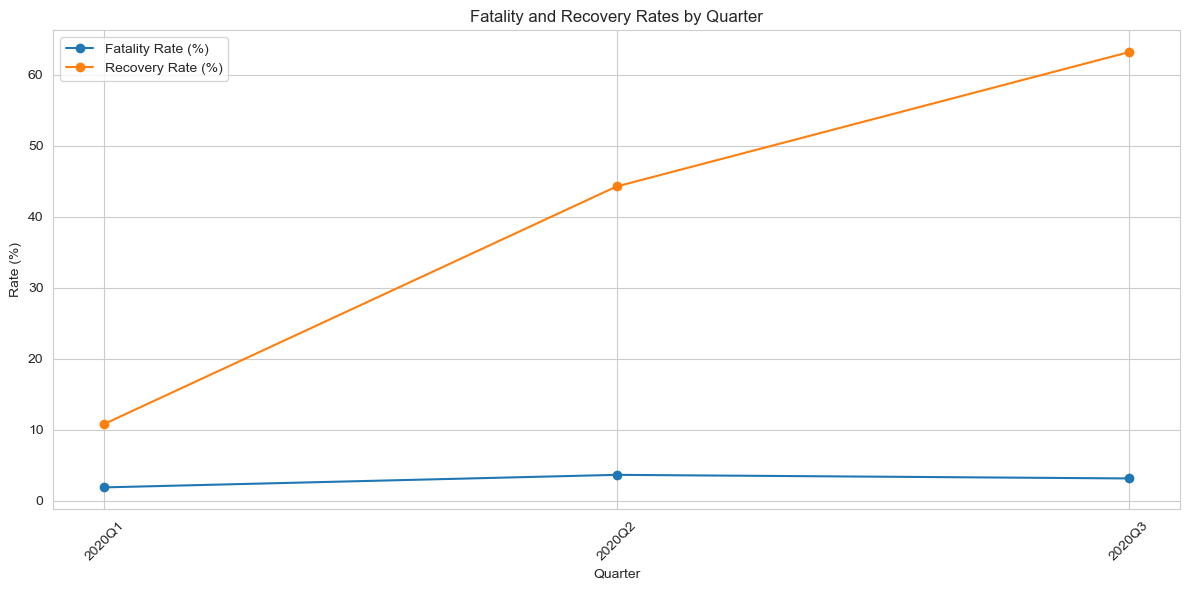

In [259]:
# Plot line chart by quarter

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(quarterly['quarter'], quarterly['death_rate'], label='Fatality Rate (%)', marker='o')
plt.plot(quarterly['quarter'], quarterly['recovery_rate'], label='Recovery Rate (%)', marker='o')
plt.xticks(rotation=45)
plt.title("Fatality and Recovery Rates by Quarter")
plt.ylabel("Rate (%)")
plt.xlabel("Quarter")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Suppose 01-04-2020 is lockdown

In [260]:
# Compare based on lockdown or vaccine rollout phases

# Manually label time periods based on specific milestones
def classify_period(date):
    if date < pd.Timestamp('2020-04-01'):
        return 'Before lockdown'
    elif date < pd.Timestamp('2021-01-01'):
        return 'During lockdown'
    elif date < pd.Timestamp('2021-06-01'):
        return 'Vaccine rollout'
    else:
        return 'Post-vaccine'

df['period'] = df['date'].apply(classify_period)

# Calculate averages for each period
period_stats = df.groupby('period')[['confirmed', 'deaths', 'recovered', 'death_rate', 'recovery_rate']].mean().reset_index()


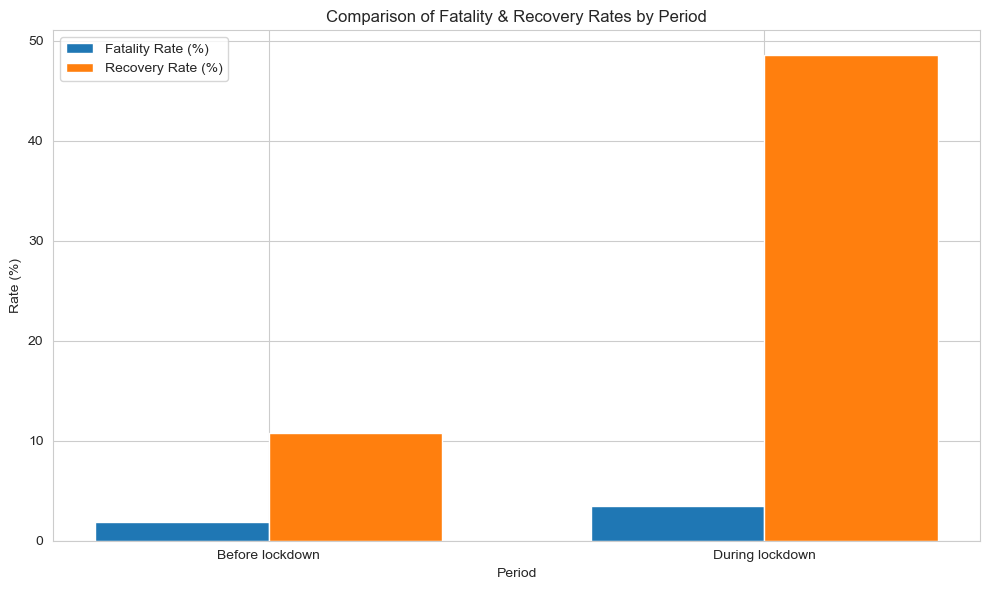

In [263]:
import numpy as np
import matplotlib.pyplot as plt

# Set bar width and group positions
bar_width = 0.35
x = np.arange(len(period_stats))  # Positions for each group

plt.figure(figsize=(10, 6))

# Plot each bar group
plt.bar(x - bar_width/2, period_stats['death_rate'], width=bar_width, label='Fatality Rate (%)')
plt.bar(x + bar_width/2, period_stats['recovery_rate'], width=bar_width, label='Recovery Rate (%)')

# Add labels and configure chart
plt.title("Comparison of Fatality & Recovery Rates by Period")
plt.xlabel("Period")
plt.ylabel("Rate (%)")
plt.xticks(x, period_stats['period'])  # X-axis labels by period
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


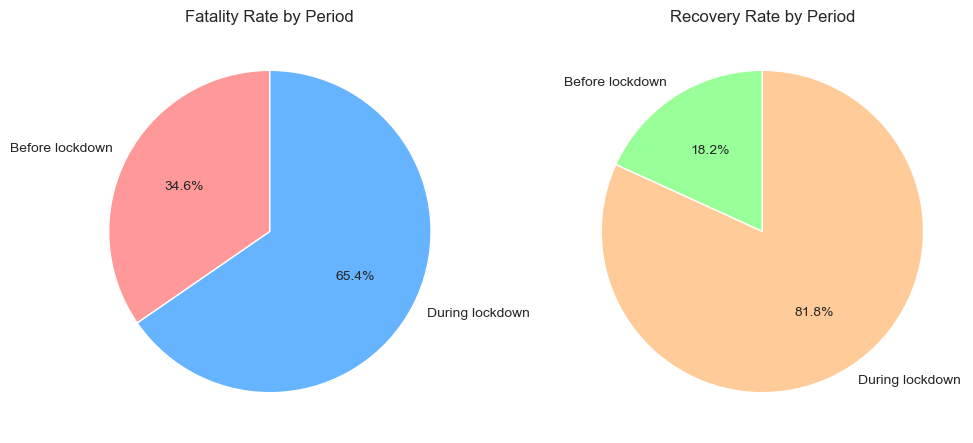

In [265]:
import matplotlib.pyplot as plt

# Step 1: Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Step 2: Assign period labels
df['period'] = df['date'].apply(lambda x: 'Before lockdown' if x < pd.Timestamp('2020-04-01') else 'During lockdown')

# Step 3: Calculate average fatality and recovery rates by period
period_stats = df.groupby('period')[['death_rate', 'recovery_rate']].mean().reset_index()

# Step 4: Plot two pie charts in a 1-row, 2-column layout
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart: Fatality rate
axs[0].pie(period_stats['death_rate'], 
           labels=period_stats['period'], 
           autopct='%.1f%%', 
           startangle=90, 
           colors=['#ff9999','#66b3ff'])
axs[0].set_title("Fatality Rate by Period")

# Pie chart: Recovery rate
axs[1].pie(period_stats['recovery_rate'], 
           labels=period_stats['period'], 
           autopct='%.1f%%', 
           startangle=90, 
           colors=['#99ff99','#ffcc99'])
axs[1].set_title("Recovery Rate by Period")

plt.tight_layout()
plt.show()


Other way

In [221]:
# Bước 1: Chuẩn bị dữ liệu và tạo nhóm thời gian

import pandas as pd

# Đảm bảo cột 'date' là datetime
df['date'] = pd.to_datetime(df['date'])

# Tạo cột năm và quý
df['year'] = df['date'].dt.year
df['quarter'] = df['date'].dt.to_period('Q').astype(str)

# Nhóm theo quý để tính tổng
df_quarter = df.groupby('quarter')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

# Tính tỷ lệ tử vong và tỷ lệ hồi phục
df_quarter['death_rate'] = df_quarter['deaths'] / df_quarter['confirmed']
df_quarter['recovery_rate'] = df_quarter['recovered'] / df_quarter['confirmed']


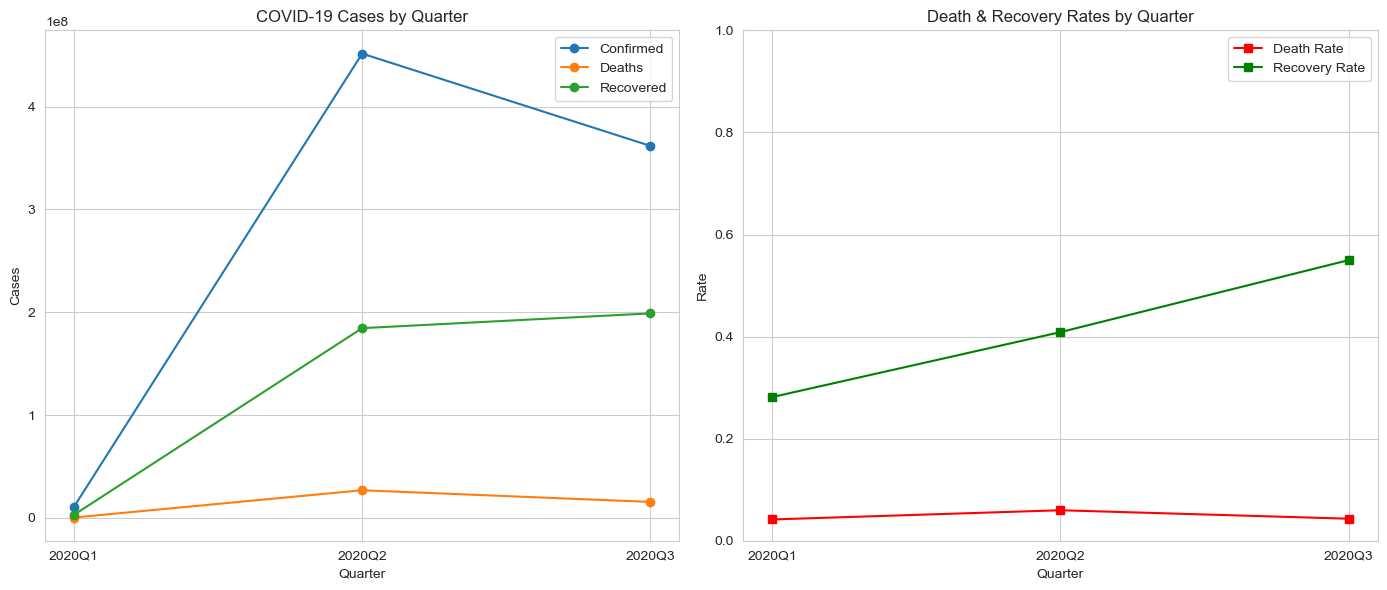

In [222]:
# Bước 2: Vẽ biểu đồ theo quý

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Biểu đồ 1: Số ca
plt.subplot(1, 2, 1)
plt.plot(df_quarter['quarter'], df_quarter['confirmed'], marker='o', label='Confirmed')
plt.plot(df_quarter['quarter'], df_quarter['deaths'], marker='o', label='Deaths')
plt.plot(df_quarter['quarter'], df_quarter['recovered'], marker='o', label='Recovered')
plt.title('COVID-19 Cases by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)

# Biểu đồ 2: Tỷ lệ tử vong và hồi phục
plt.subplot(1, 2, 2)
plt.plot(df_quarter['quarter'], df_quarter['death_rate'], marker='s', label='Death Rate', color='red')
plt.plot(df_quarter['quarter'], df_quarter['recovery_rate'], marker='s', label='Recovery Rate', color='green')
plt.title('Death & Recovery Rates by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Rate')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### 5. Phân tích mức độ bùng phát

Do có số âm nân cần xử lý trước khi vẽ biểu đồ.

Dưới đây là đoạn code hoàn chỉnh đã được gộp lại, bao gồm các bước:

-   Đọc dữ liệu

-   Tiền xử lý

-   Loại bỏ giá trị âm ở các cột liên quan

-   Phân tích trước và sau lockdown

In [266]:
import pandas as pd

# 1. Đọc dữ liệu
# df = pd.read_csv('vietnam_covid_data.csv')

# 2. Đảm bảo kiểu dữ liệu datetime
df['date'] = pd.to_datetime(df['date'])

# 3. Thêm cột 'month_year'
df['month_year'] = df['date'].dt.to_period('M')

# 4. Loại bỏ các dòng có giá trị âm trong các cột quan trọng
df = df[
    (df['confirmed'] >= 0) &
    (df['deaths'] >= 0) &
    (df['recovered'] >= 0) &
    (df['active'] >= 0) &
    (df['new_cases'] >= 0) &
    (df['new_deaths'] >= 0)
]

# 5. Tạo biến lockdown để phân tách trước/sau ngày giãn cách
lockdown_date = pd.to_datetime('2021-04-01')
df['lockdown'] = df['date'].apply(lambda x: 'Trước giãn cách' if x < lockdown_date else 'Sau giãn cách')

# 6. Tính tổng ca nhiễm và tử vong trước/sau giãn cách
summary = df.groupby('lockdown')[['confirmed', 'deaths']].sum()

# 7. Tính tỉ lệ tử vong = deaths / confirmed
summary['tỉ lệ tử vong (%)'] = round(summary['deaths'] / summary['confirmed'] * 100, 2)

# 8. In kết quả
print(summary)

# 9. (Tuỳ chọn) Xuất kết quả ra CSV
# summary.to_csv('summary_lockdown_analysis.csv')


                 confirmed    deaths  tỉ lệ tử vong (%)
lockdown                                               
Trước giãn cách  824056522  43023287               5.22


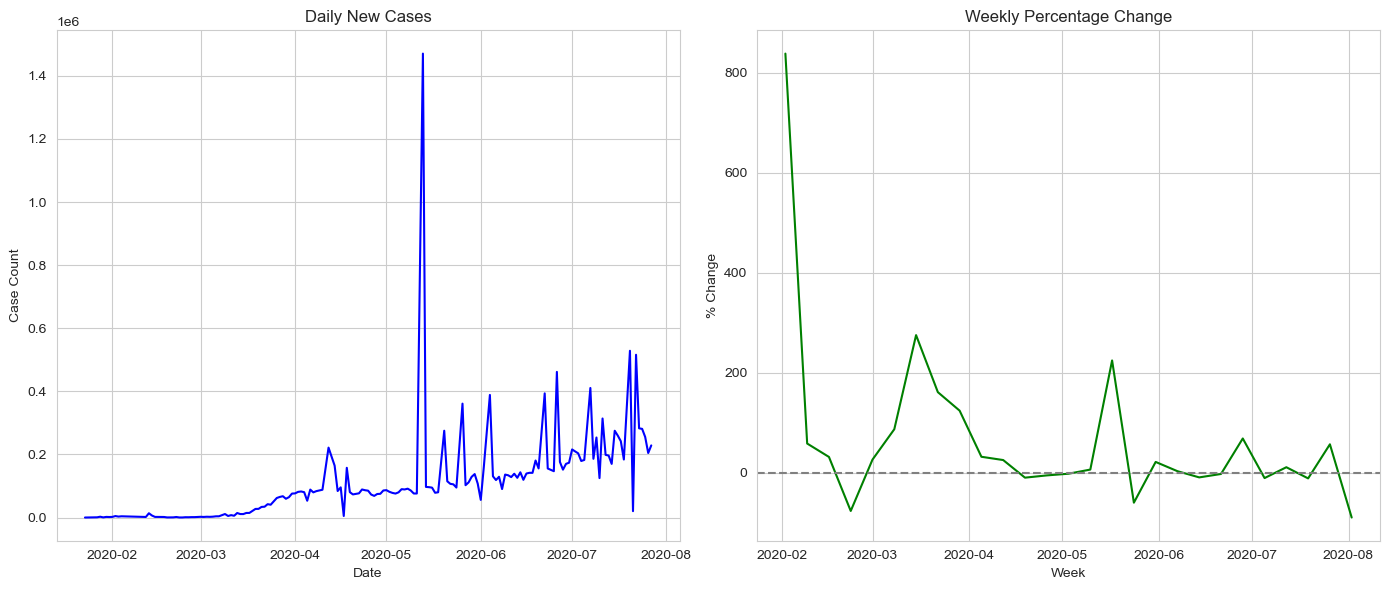

In [267]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume you have a DataFrame named df with columns: 'date', 'country', 'confirmed'

# Step 1: Convert the date column and aggregate total cases by day
df['date'] = pd.to_datetime(df['date'])
daily_df = df.groupby('date')['confirmed'].sum().reset_index()
daily_df = daily_df.sort_values('date')

# Step 2: Calculate new cases per day and percentage change
daily_df['daily_new'] = daily_df['confirmed'].diff()
daily_df['pct_change'] = daily_df['daily_new'].pct_change() * 100

# Remove negative values (if any)
daily_df = daily_df[daily_df['daily_new'] >= 0]

# Step 3: Compute weekly averages
weekly_df = daily_df.set_index('date').resample('W').sum().reset_index()
weekly_df['pct_change'] = weekly_df['daily_new'].pct_change() * 100

# ----------------- PLOTTING CHART -----------------
plt.figure(figsize=(14, 6))

# Subplot 1: Daily new cases
plt.subplot(1, 2, 1)
plt.plot(daily_df['date'], daily_df['daily_new'], label='Daily New Cases', color='blue')
plt.title('Daily New Cases')
plt.xlabel('Date')
plt.ylabel('Case Count')
plt.grid(True)
plt.tight_layout()

# Subplot 2: Weekly % change
plt.subplot(1, 2, 2)
plt.plot(weekly_df['date'], weekly_df['pct_change'], label='Weekly % Change', color='green')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Weekly Percentage Change')
plt.xlabel('Week')
plt.ylabel('% Change')
plt.grid(True)
plt.tight_layout()

plt.show()


✅ Meaning of Negative Values in Percentage Change Charts:

-   A negative value indicates a decrease in the number of cases compared to the previous period.

-   A positive value indicates an increase in the number of cases compared to the previous period.

🧠 Ví dụ đơn giản:

| Date | New Cases | 	% Change from Previous Day  |
| ---- | --------- | --------------------------- |
| 1/1  | 100       | —                           |
| 2/1  | 120       | +20%                        |
| 3/1  | 90        | -25%                        |

In this case, 90 is a decrease compared to 120 → the percentage chart will show a negative value, which is absolutely correct.

### 6. Regional Analysis

In [225]:
df.head()

,date,country_region,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered,who_region,...,month,year,month_year,calculated_active,active_match,death_rate,recovery_rate,quarter,period,lockdown
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,...,2020-01,2020,2020-01,0,True,NaN,NaN,2020Q1,Trước lockdown,Trước giãn cách
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,...,2020-01,2020,2020-01,0,True,NaN,NaN,2020Q1,Trước lockdown,Trước giãn cách
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,...,2020-01,2020,2020-01,0,True,NaN,NaN,2020Q1,Trước lockdown,Trước giãn cách
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,...,2020-01,2020,2020-01,0,True,NaN,NaN,2020Q1,Trước lockdown,Trước giãn cách
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,...,2020-01,2020,2020-01,0,True,NaN,NaN,2020Q1,Trước lockdown,Trước giãn cách


In [226]:
# Tính tổng và tỷ lệ trung bình theo khu vực
# Nhóm theo khu vực WHO
region_summary = df.groupby("who_region").agg({
    "confirmed": "sum",
    "deaths": "sum",
    "recovered": "sum",
    "active": "sum"
})

# Tính tỷ lệ tử vong và hồi phục
region_summary["death_rate"] = region_summary["deaths"] / region_summary["confirmed"]
region_summary["recovery_rate"] = region_summary["recovered"] / region_summary["confirmed"]

# Làm đẹp dữ liệu: làm tròn
region_summary = region_summary.round(4)

# Hiển thị
region_summary.sort_values("confirmed", ascending=False)


,confirmed,deaths,recovered,active,death_rate,recovery_rate
who_region,,,,,,
Americas,400015685,19219682,156289944,224506059,0.0480,0.3907
Europe,246830467,19055771,122258200,105516496,0.0772,0.4953
Eastern Mediterranean,74080449,1923968,48050075,24106406,0.0260,0.6486
South-East Asia,55117856,1458130,30030301,23629425,0.0265,0.5448
Western Pacific,26240959,926499,18749246,6565214,0.0353,0.7145
Africa,21771106,439237,11183493,10148376,0.0202,0.5137


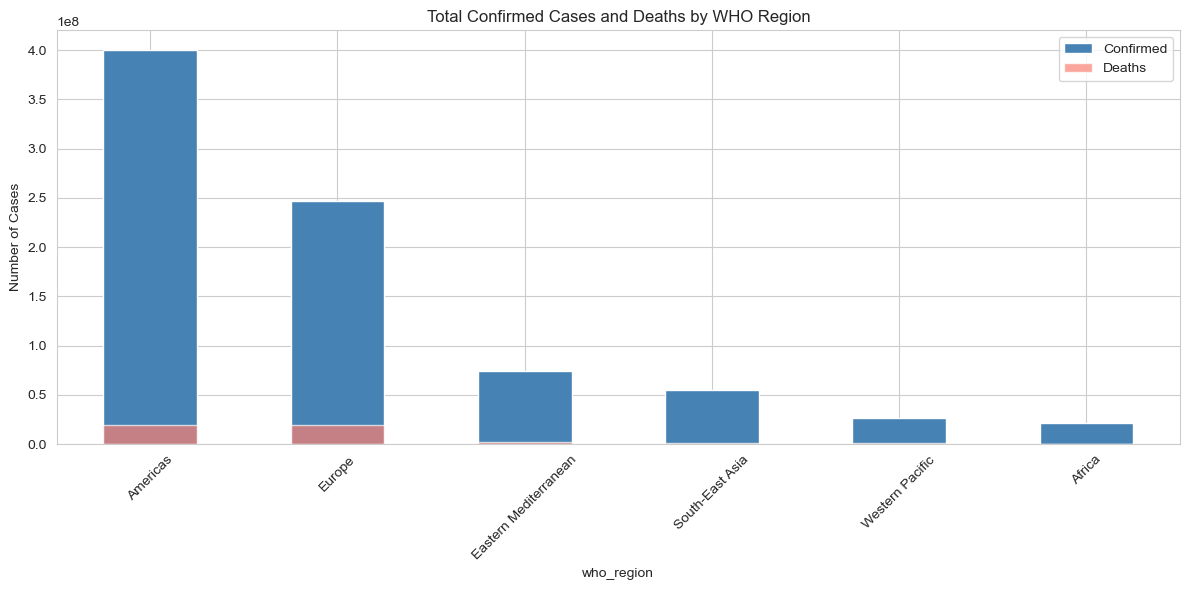

In [268]:
# Bar chart: Number of confirmed cases and deaths by region

import matplotlib.pyplot as plt

region_summary_sorted = region_summary.sort_values("confirmed", ascending=False)

plt.figure(figsize=(12,6))
region_summary_sorted["confirmed"].plot(kind="bar", color="steelblue", label="Confirmed")
region_summary_sorted["deaths"].plot(kind="bar", color="salmon", alpha=0.7, label="Deaths")

plt.title("Total Confirmed Cases and Deaths by WHO Region")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


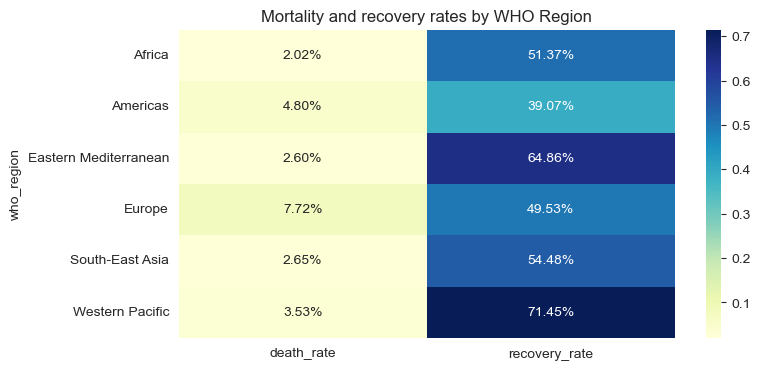

In [269]:
# Heatmap: Tỷ lệ tử vong và hồi phục theo khu vực

import seaborn as sns

plt.figure(figsize=(8,4))
sns.heatmap(region_summary[["death_rate", "recovery_rate"]], annot=True, cmap="YlGnBu", fmt=".2%")
plt.title("Mortality and recovery rates by WHO Region")
plt.show()


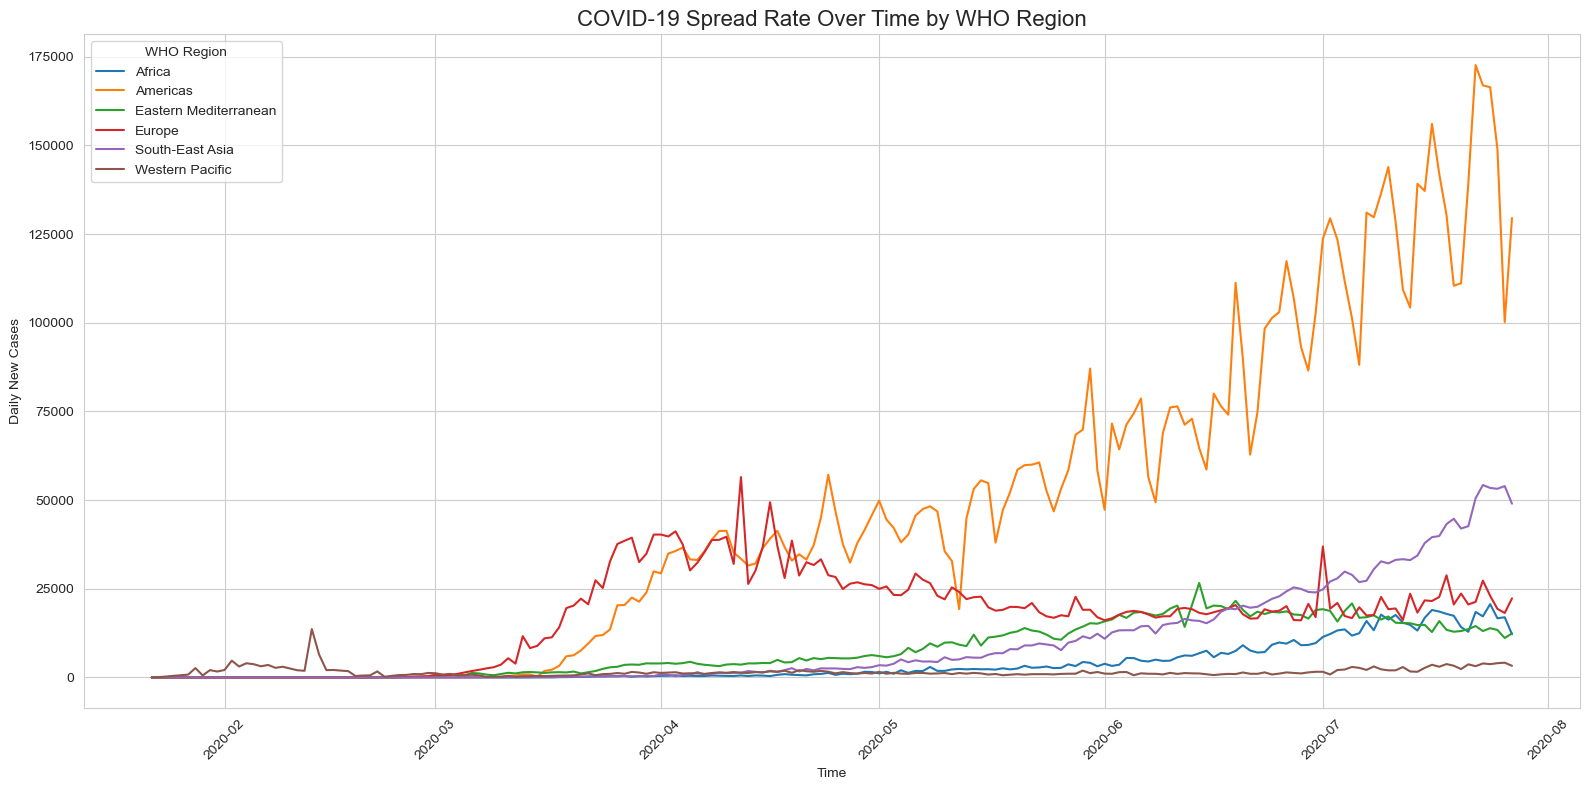

In [270]:
# Analyze COVID-19 spread rate over time by region

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the date column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Remove rows missing new_cases or who_region data
df_filtered = df.dropna(subset=['new_cases', 'who_region'])

# Total new cases by date and region
region_daily = df_filtered.groupby(['date', 'who_region'])['new_cases'].sum().reset_index()

# Set up the plot
plt.figure(figsize=(16, 8))
sns.lineplot(data=region_daily, x='date', y='new_cases', hue='who_region')

# Customize the chart
plt.title('COVID-19 Spread Rate Over Time by WHO Region', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Daily New Cases')
plt.xticks(rotation=45)
plt.legend(title='WHO Region')
plt.tight_layout()

plt.show()


<Figure size 1400x600 with 0 Axes>

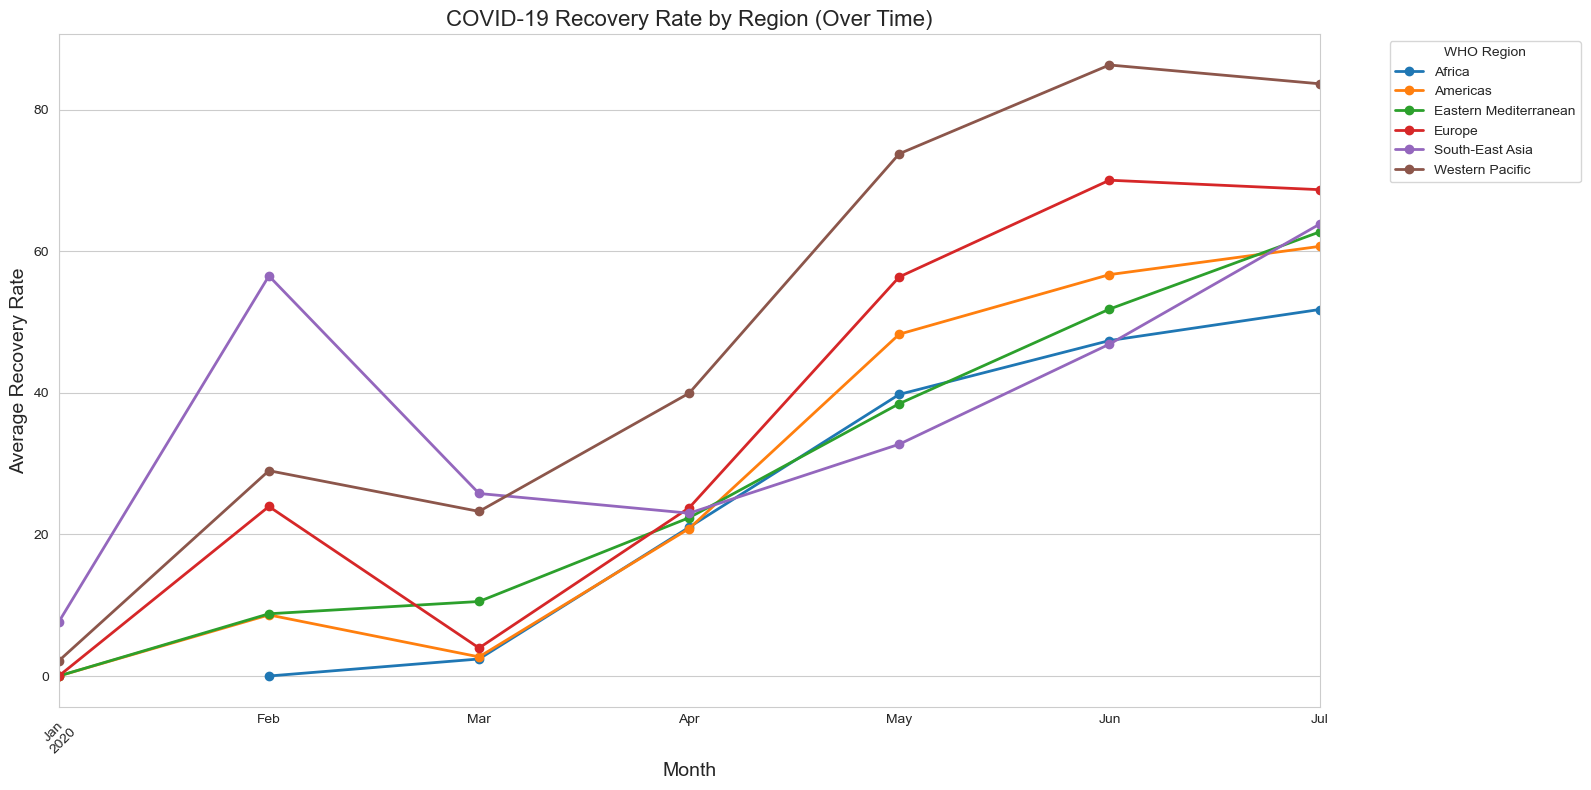

In [271]:
# Analyze COVID-19 recovery rate by region (who_region)
# Step 1: Calculate average recovery rate by month and region

# Calculate average recovery rate by month and region
recovery_by_region = df.groupby(['month_year', 'who_region'])['recovery_rate'].mean().reset_index()

# Pivot for easier charting
recovery_pivot = recovery_by_region.pivot(index='month_year', columns='who_region', values='recovery_rate')

# Step 2: Plot recovery rate trend
plt.figure(figsize=(14, 6))
recovery_pivot.plot(marker='o', figsize=(16, 8), linewidth=2)
plt.title('COVID-19 Recovery Rate by Region (Over Time)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Recovery Rate', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='WHO Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


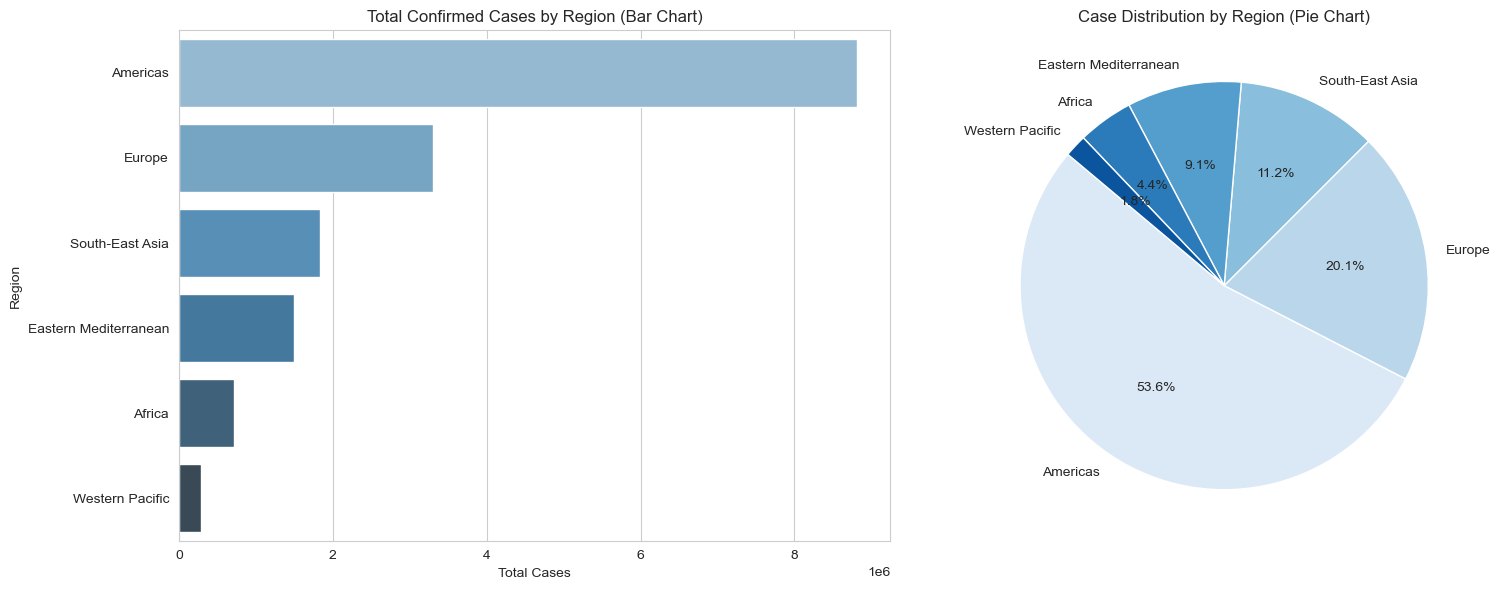

In [272]:
# Total confirmed cases by region

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume df is the original DataFrame and contains columns 'who_region' and 'new_cases'
region_cases = df.groupby('who_region')['new_cases'].sum().sort_values(ascending=False).reset_index()

# Create charts
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart: using hue to avoid warnings
sns.barplot(
    data=region_cases,
    x='new_cases',
    y='who_region',
    hue='who_region',
    dodge=False,
    palette='Blues_d',
    ax=axes[0],
    legend=False  # Disable legend if not needed
)
axes[0].set_title('Total Confirmed Cases by Region (Bar Chart)')
axes[0].set_xlabel('Total Cases')
axes[0].set_ylabel('Region')

# Pie chart
axes[1].pie(
    region_cases['new_cases'],
    labels=region_cases['who_region'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Blues", len(region_cases))
)
axes[1].set_title('Case Distribution by Region (Pie Chart)')

plt.tight_layout()
plt.show()


## More insight

📈 Tính tốc độ tăng trưởng ca nhiễm theo ngày

In [273]:
import pandas as pd

# Lọc dữ liệu cho United Kingdom
uk_df = df[df['country_region'] == 'United Kingdom'].sort_values('date')

# Tính tốc độ tăng trưởng ca nhiễm theo ngày
uk_df['confirmed_growth_pct'] = uk_df['confirmed'].pct_change() * 100

# Hiển thị kết quả
uk_df[['date', 'confirmed', 'confirmed_growth_pct']].tail(10)


,date,confirmed,confirmed_growth_pct
33463,2020-07-18,295632,0.281205
33650,2020-07-19,296358,0.245576
33837,2020-07-20,296944,0.197734
34024,2020-07-21,297389,0.149860
34211,2020-07-22,297952,0.189314
34398,2020-07-23,298731,0.261452
34585,2020-07-24,299500,0.257422
34772,2020-07-25,300270,0.257095
34959,2020-07-26,301020,0.249775
35146,2020-07-27,301708,0.228556


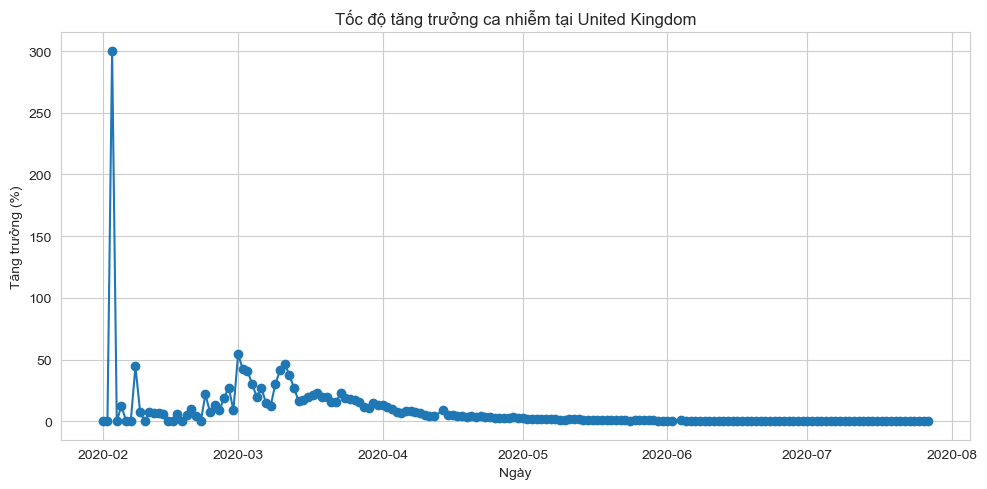

In [274]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(uk_df['date'], uk_df['confirmed_growth_pct'], marker='o', linestyle='-')
plt.title("Tốc độ tăng trưởng ca nhiễm tại United Kingdom")
plt.xlabel("Ngày")
plt.ylabel("Tăng trưởng (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


📊 Phân tích tốc độ tăng trưởng giữa các quốc gia

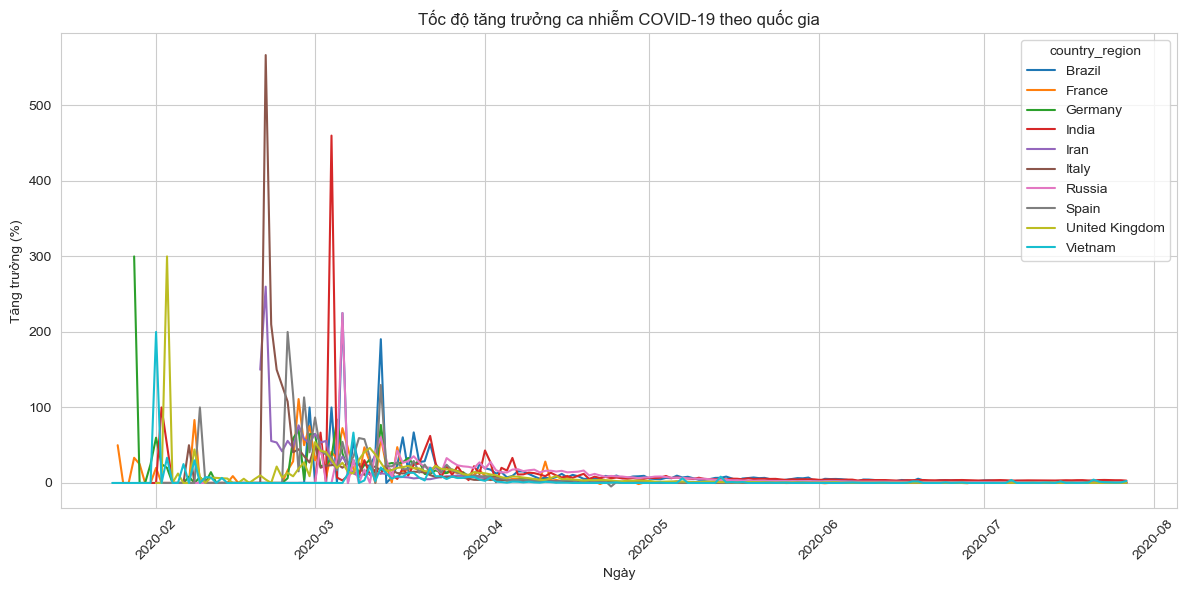

In [275]:


# Sắp xếp dữ liệu theo quốc gia và thời gian
df = df.sort_values(by=['country_region', 'date'])

# Tính phần trăm thay đổi theo ngày cho mỗi quốc gia
df['growth_pct'] = df.groupby('country_region')['confirmed'].pct_change() * 100

# Chọn một số quốc gia để so sánh
selected_countries = ['United States', 'Brazil','Russia','India', 'Spain', 'Italy', 'United Kingdom','France', 'Germany', 'Iran', 'Vietnam']     
df_filtered = df[df['country_region'].isin(selected_countries)]

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='date', y='growth_pct', hue='country_region')
plt.title("Tốc độ tăng trưởng ca nhiễm COVID-19 theo quốc gia")
plt.xlabel("Ngày")
plt.ylabel("Tăng trưởng (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


⚰️ Rolling Death Rate Analysis (7-Day Moving Average) ---- Tỉ lệ tử vong theo thơi gian

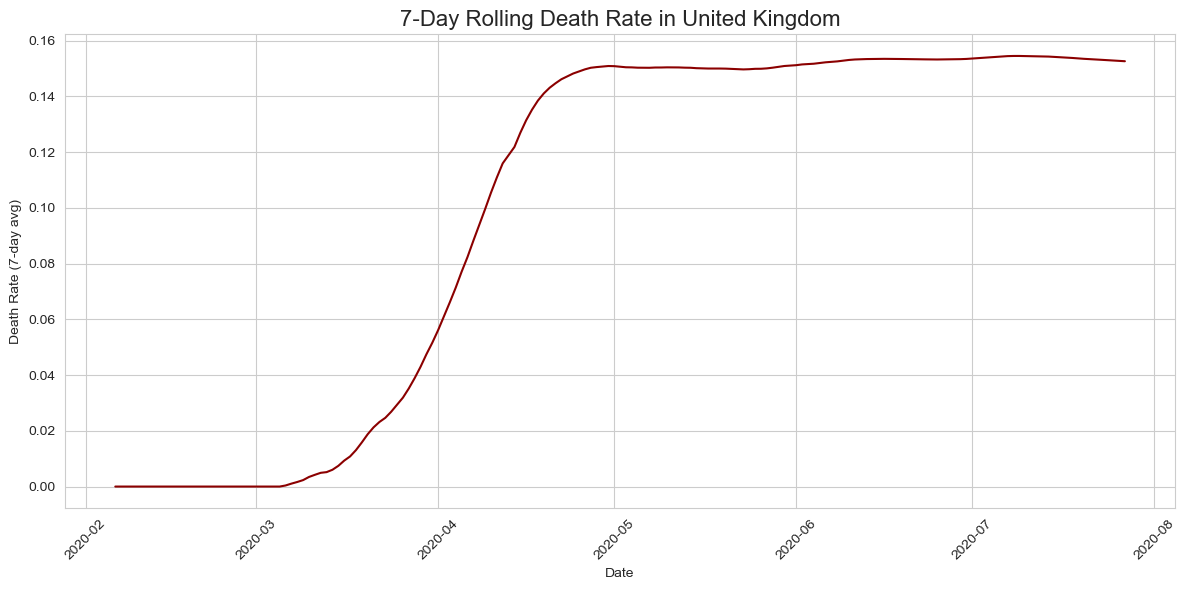

In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lọc dữ liệu cho một quốc gia (ví dụ: United Kingdom)
country = "United Kingdom"
df_country = df[df['country_region'] == country].sort_values('date')

# Tính tỷ lệ tử vong và rolling trung bình 7 ngày
df_country['death_rate'] = df_country['deaths'] / df_country['confirmed']
df_country['rolling_death_rate'] = df_country['death_rate'].rolling(window=7).mean()

# Vẽ biểu đồ
plt.figure(figsize=(12,6))
sns.lineplot(data=df_country, x='date', y='rolling_death_rate', color='darkred')
plt.title(f"7-Day Rolling Death Rate in {country}", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Death Rate (7-day avg)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


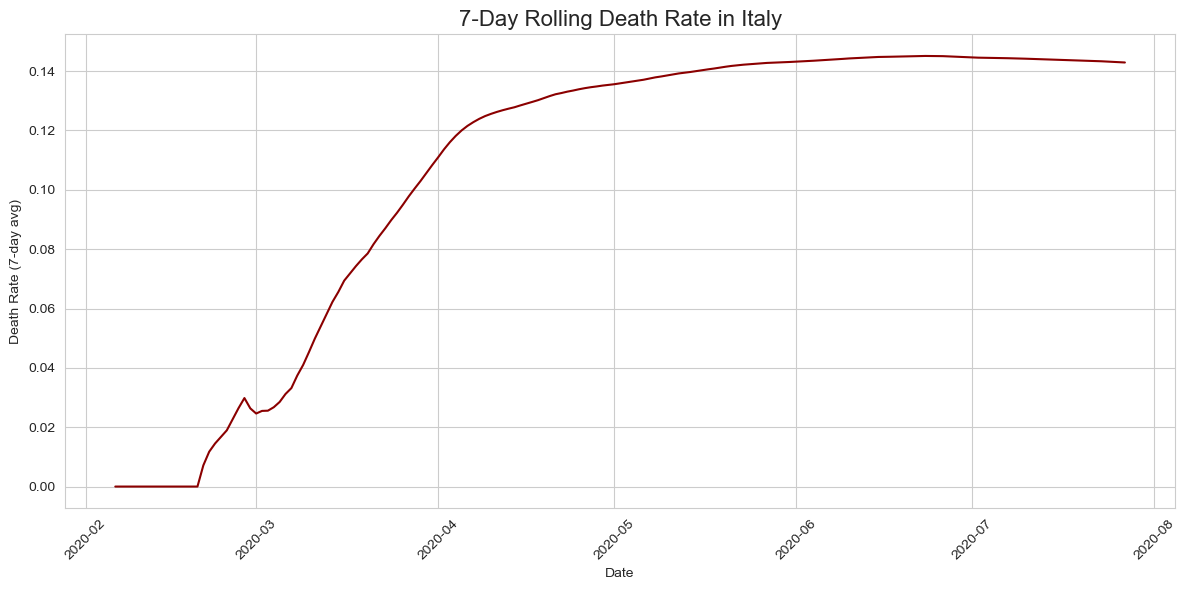

In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lọc dữ liệu cho một quốc gia (ví dụ: Italy)
country = "Italy"
df_country = df[df['country_region'] == country].sort_values('date')

# Tính tỷ lệ tử vong và rolling trung bình 7 ngày
df_country['death_rate'] = df_country['deaths'] / df_country['confirmed']
df_country['rolling_death_rate'] = df_country['death_rate'].rolling(window=7).mean()

# Vẽ biểu đồ
plt.figure(figsize=(12,6))
sns.lineplot(data=df_country, x='date', y='rolling_death_rate', color='darkred')
plt.title(f"7-Day Rolling Death Rate in {country}", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Death Rate (7-day avg)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

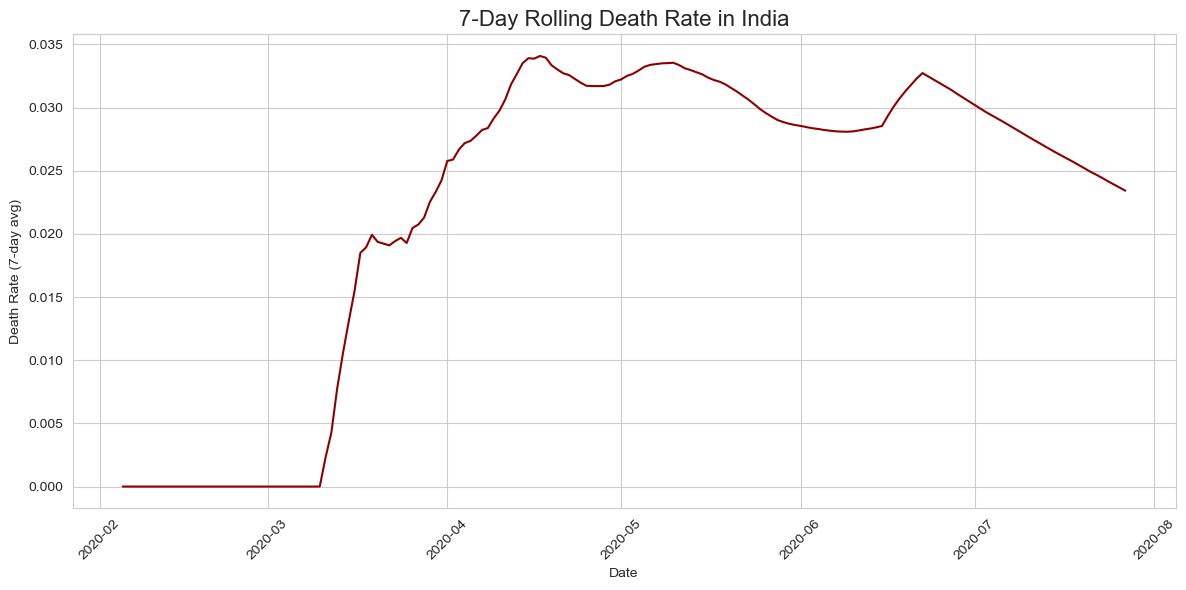

In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lọc dữ liệu cho một quốc gia (ví dụ: India)
country = "India"
df_country = df[df['country_region'] == country].sort_values('date')

# Tính tỷ lệ tử vong và rolling trung bình 7 ngày
df_country['death_rate'] = df_country['deaths'] / df_country['confirmed']
df_country['rolling_death_rate'] = df_country['death_rate'].rolling(window=7).mean()

# Vẽ biểu đồ
plt.figure(figsize=(12,6))
sns.lineplot(data=df_country, x='date', y='rolling_death_rate', color='darkred')
plt.title(f"7-Day Rolling Death Rate in {country}", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Death Rate (7-day avg)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

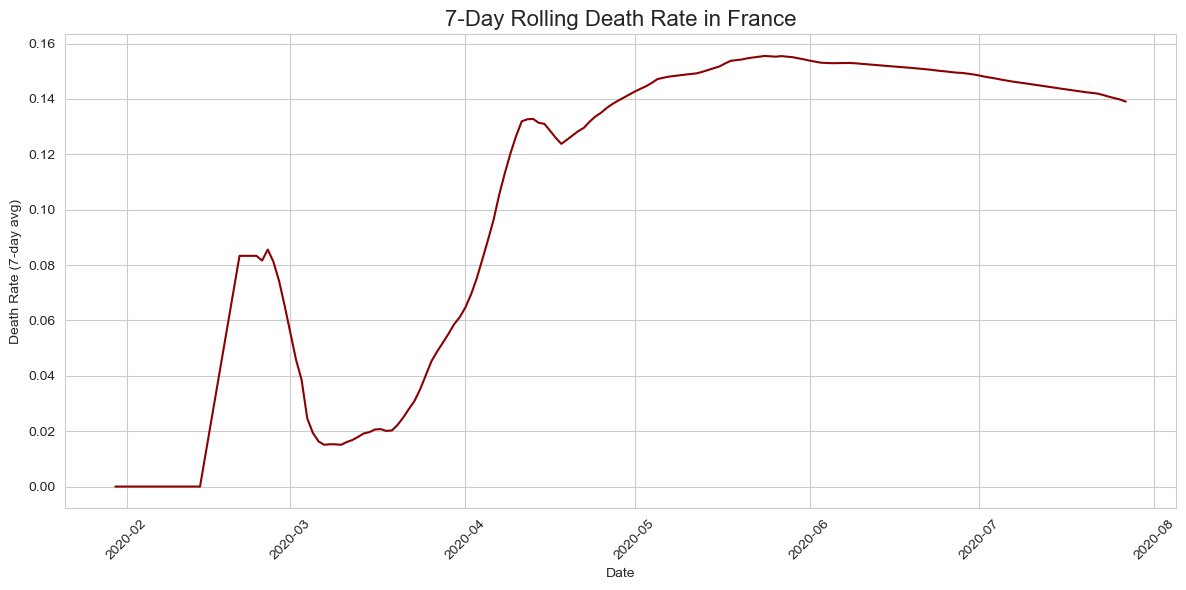

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lọc dữ liệu cho một quốc gia (ví dụ: France)
country = "France"
df_country = df[df['country_region'] == country].sort_values('date')

# Tính tỷ lệ tử vong và rolling trung bình 7 ngày
df_country['death_rate'] = df_country['deaths'] / df_country['confirmed']
df_country['rolling_death_rate'] = df_country['death_rate'].rolling(window=7).mean()

# Vẽ biểu đồ
plt.figure(figsize=(12,6))
sns.lineplot(data=df_country, x='date', y='rolling_death_rate', color='darkred')
plt.title(f"7-Day Rolling Death Rate in {country}", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Death Rate (7-day avg)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

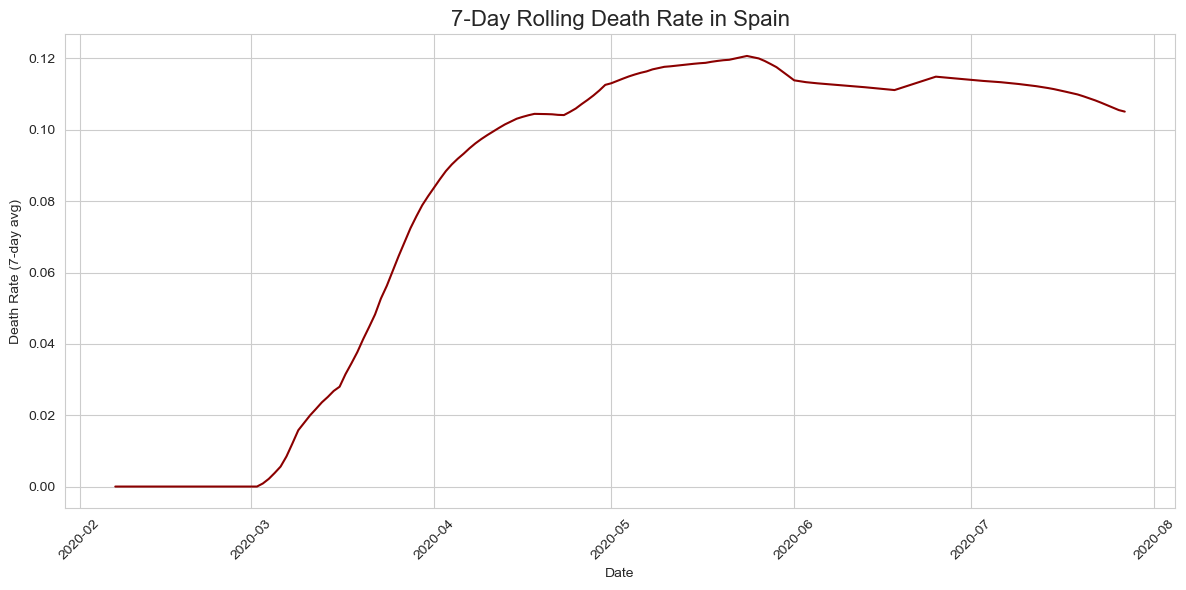

In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lọc dữ liệu cho một quốc gia (ví dụ: Spain)
country = "Spain"
df_country = df[df['country_region'] == country].sort_values('date')

# Tính tỷ lệ tử vong và rolling trung bình 7 ngày
df_country['death_rate'] = df_country['deaths'] / df_country['confirmed']
df_country['rolling_death_rate'] = df_country['death_rate'].rolling(window=7).mean()

# Vẽ biểu đồ
plt.figure(figsize=(12,6))
sns.lineplot(data=df_country, x='date', y='rolling_death_rate', color='darkred')
plt.title(f"7-Day Rolling Death Rate in {country}", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Death Rate (7-day avg)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

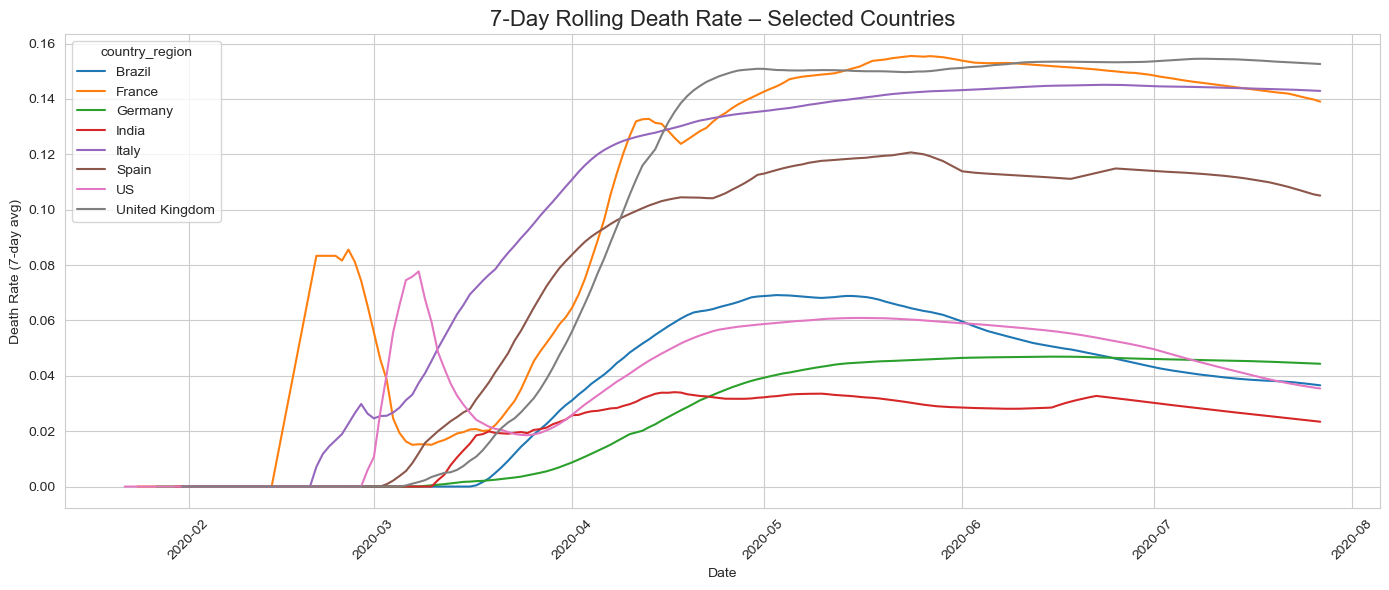

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Danh sách quốc gia cần phân tích
countries = ['US', 'United Kingdom', 'France', 'Italy', 'Germany', 'Spain', 'Brazil', 'India']

# Lọc dữ liệu cho các quốc gia
df_selected = df[df['country_region'].isin(countries)].copy()
df_selected = df_selected.sort_values(['country_region', 'date'])

# Tính tỷ lệ tử vong và rolling trung bình 7 ngày
df_selected['death_rate'] = df_selected['deaths'] / df_selected['confirmed']
df_selected['rolling_death_rate'] = df_selected.groupby('country_region')['death_rate'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Vẽ biểu đồ so sánh
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_selected, x='date', y='rolling_death_rate', hue='country_region')
plt.title("7-Day Rolling Death Rate – Selected Countries", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Death Rate (7-day avg)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


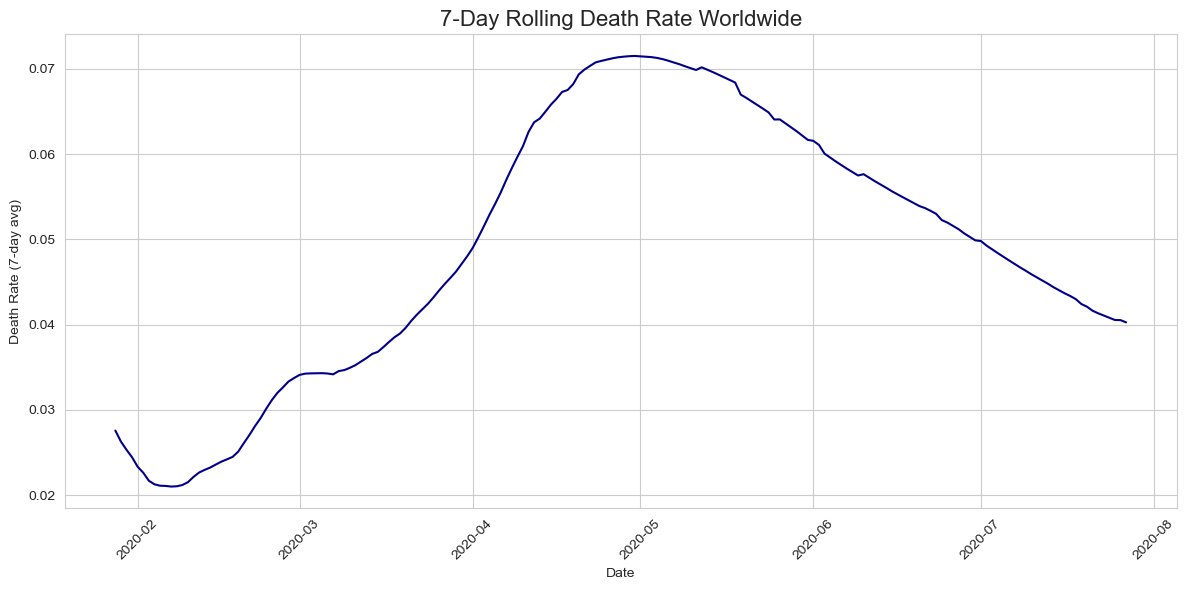

In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Nhóm dữ liệu theo ngày toàn cầu
df_global = df.groupby('date')[['confirmed', 'deaths']].sum().reset_index()

# Tính tỷ lệ tử vong và rolling trung bình 7 ngày
df_global['death_rate'] = df_global['deaths'] / df_global['confirmed']
df_global['rolling_death_rate'] = df_global['death_rate'].rolling(window=7).mean()

# Vẽ biểu đồ
plt.figure(figsize=(12,6))
sns.lineplot(data=df_global, x='date', y='rolling_death_rate', color='darkblue')
plt.title("7-Day Rolling Death Rate Worldwide", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Death Rate (7-day avg)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


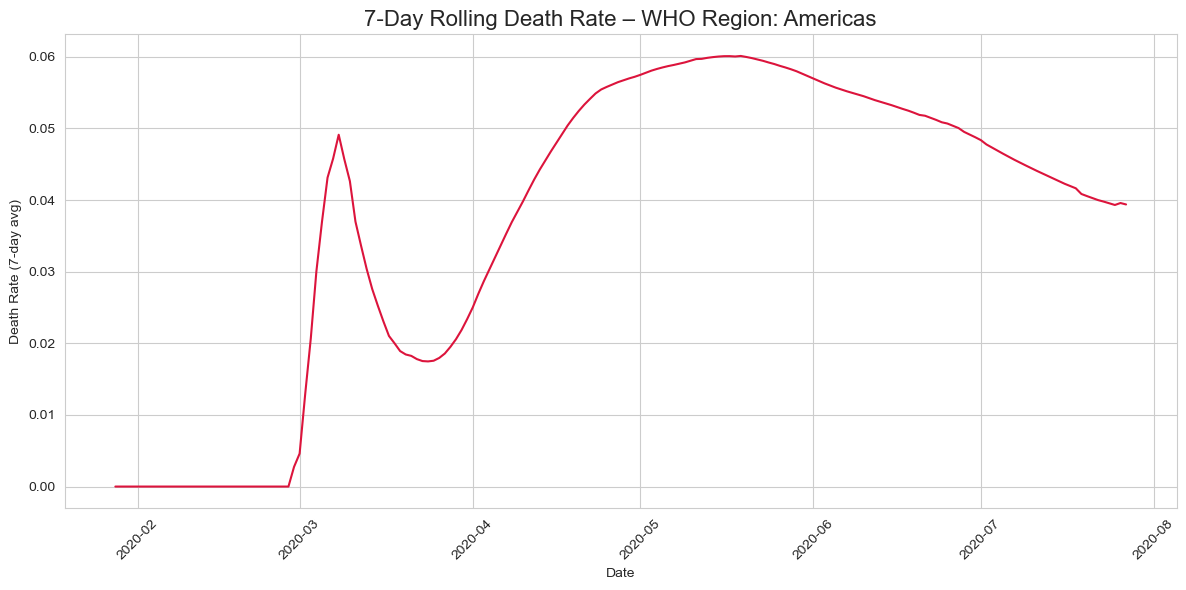

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Lọc dữ liệu theo WHO_region = 'Americas'
df_americas = df[df['who_region'] == 'Americas'].copy()
df_americas = df_americas.sort_values('date')

# Tính tổng số ca tử vong và ca nhiễm theo ngày toàn khu vực
daily = df_americas.groupby('date')[['deaths', 'confirmed']].sum().reset_index()

# Tính tỷ lệ tử vong và rolling trung bình 7 ngày
daily['death_rate'] = daily['deaths'] / daily['confirmed']
daily['rolling_death_rate'] = daily['death_rate'].rolling(window=7).mean()


plt.figure(figsize=(12,6))
sns.lineplot(data=daily, x='date', y='rolling_death_rate', color='crimson')
plt.title("7-Day Rolling Death Rate – WHO Region: Americas", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Death Rate (7-day avg)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


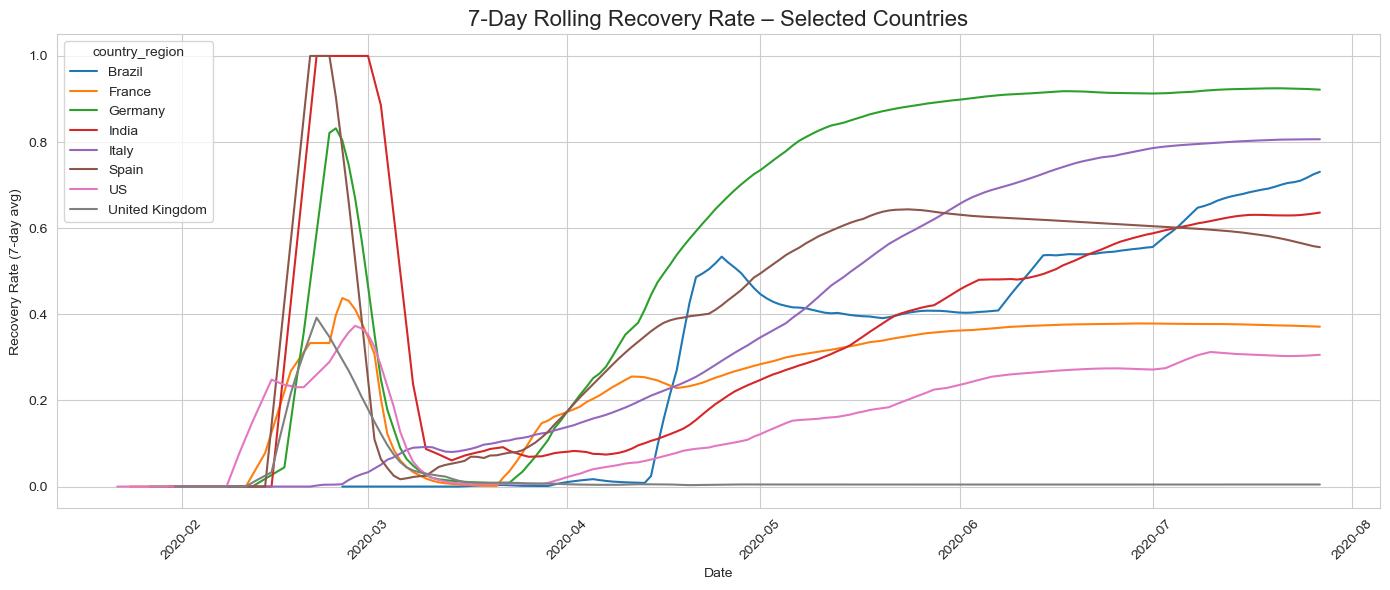

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Danh sách quốc gia cần phân tích
countries = ['US', 'United Kingdom', 'France', 'Italy', 'Germany', 'Spain', 'Brazil', 'India']

# Lọc dữ liệu cho các quốc gia
df_selected = df[df['country_region'].isin(countries)].copy()
df_selected = df_selected.sort_values(['country_region', 'date'])

# Tính tỷ lệ hồi phục và rolling trung bình 7 ngày
df_selected['recovery_rate'] = df_selected['recovered'] / df_selected['confirmed']
df_selected['rolling_recovery_rate'] = df_selected.groupby('country_region')['recovery_rate'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Vẽ biểu đồ so sánh
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_selected, x='date', y='rolling_recovery_rate', hue='country_region')
plt.title("7-Day Rolling Recovery Rate – Selected Countries", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Recovery Rate (7-day avg)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



Mối tương quan giữa "Số ca nhiễm" và "Số ca hồi phục"

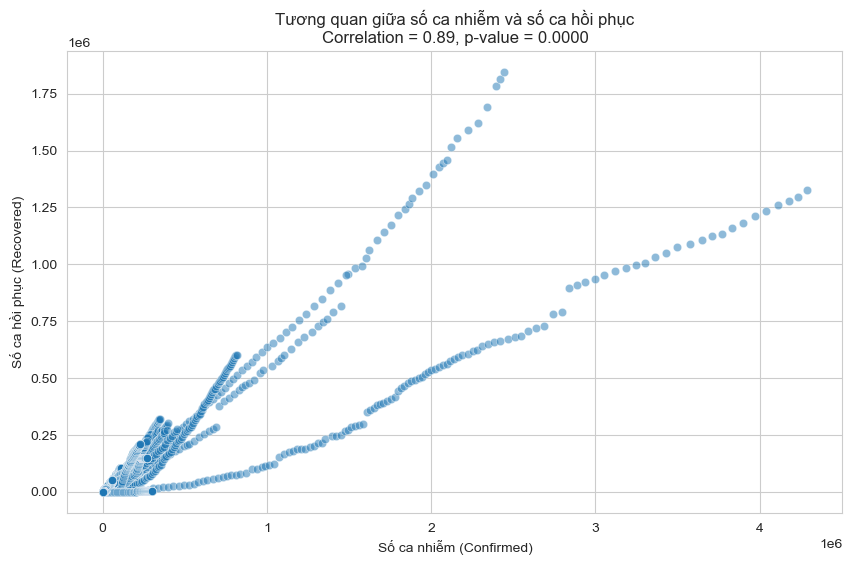

In [278]:
from scipy.stats import pearsonr

# Tính hệ số tương quan
corr_recovery, p_value = pearsonr(df['confirmed'], df['recovered'])

# Trực quan hóa
plt.figure(figsize=(10, 6))
sns.scatterplot(x='confirmed', y='recovered', data=df, alpha=0.5)
plt.title(f'Tương quan giữa số ca nhiễm và số ca hồi phục\nCorrelation = {corr_recovery:.2f}, p-value = {p_value:.4f}')
plt.xlabel('Số ca nhiễm (Confirmed)')
plt.ylabel('Số ca hồi phục (Recovered)')
plt.grid(True)
plt.show()